# Algoritmos de Diferen√ßa Temporal: SARSA, Q-Learning e Expected SARSA

## Implementa√ß√£o no Ambiente Cliff Walking

## 1. Introdu√ß√£o Te√≥rica

### 1.1 M√©todos de Diferen√ßa Temporal (TD)

Os m√©todos de Diferen√ßa Temporal combinam ideias de **Programa√ß√£o Din√¢mica** e **Monte Carlo**:
- Como DP: fazem *bootstrapping* (estimam valores usando outras estimativas)
- Como MC: aprendem diretamente da experi√™ncia (model-free)

A equa√ß√£o b√°sica de atualiza√ß√£o TD √©:

$$V(S_t) \leftarrow V(S_t) + \alpha [R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

Onde:
- $\alpha$ √© a taxa de aprendizado (learning rate)
- $\gamma$ √© o fator de desconto (discount factor)
- $R_{t+1}$ √© a recompensa recebida
- O termo $[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$ √© chamado de **erro TD**

---

### 1.2 SARSA (State-Action-Reward-State-Action)

**SARSA** √© um algoritmo **on-policy** que aprende a fun√ß√£o $Q(s,a)$ enquanto segue a pol√≠tica atual.

#### Equa√ß√£o de Atualiza√ß√£o:

$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]$$

**Caracter√≠sticas:**
- **On-policy**: aprende sobre a pol√≠tica que est√° seguindo
- **Cauteloso**: considera a explora√ß√£o na atualiza√ß√£o
- **Seguro**: aprende pol√≠ticas mais conservadoras em ambientes com riscos
- Usa a a√ß√£o $A_{t+1}$ que ser√° **efetivamente tomada**

#### Pseudoc√≥digo:

```
Inicializar Q(s,a) arbitrariamente, ‚àÄs ‚àà S, a ‚àà A
Par√¢metros: Œ±, Œ≥, Œµ

Para cada epis√≥dio:
    Inicializar S
    Escolher A de S usando pol√≠tica Œµ-greedy derivada de Q
    
    Para cada passo do epis√≥dio:
        Executar a√ß√£o A, observar R, S'
        Escolher A' de S' usando pol√≠tica Œµ-greedy derivada de Q
        Q(S,A) ‚Üê Q(S,A) + Œ±[R + Œ≥Q(S',A') - Q(S,A)]
        S ‚Üê S'; A ‚Üê A'
    At√© S ser terminal
```

---

### 1.3 Q-Learning

**Q-Learning** √© um algoritmo **off-policy** que aprende a pol√≠tica √≥tima independentemente da pol√≠tica sendo seguida.

#### Equa√ß√£o de Atualiza√ß√£o:

$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t)]$$

**Caracter√≠sticas:**
- **Off-policy**: aprende $Q^*$ independente da pol√≠tica de comportamento
- **Otimista**: assume que agir√° otimamente no futuro
- **Agressivo**: pode aprender pol√≠ticas arriscadas
- Usa $\max_a Q(S_{t+1}, a)$ ao inv√©s da a√ß√£o escolhida

#### Pseudoc√≥digo:

```
Inicializar Q(s,a) arbitrariamente, ‚àÄs ‚àà S, a ‚àà A
Par√¢metros: Œ±, Œ≥, Œµ

Para cada epis√≥dio:
    Inicializar S
    
    Para cada passo do epis√≥dio:
        Escolher A de S usando pol√≠tica Œµ-greedy derivada de Q
        Executar a√ß√£o A, observar R, S'
        Q(S,A) ‚Üê Q(S,A) + Œ±[R + Œ≥ max_a Q(S',a) - Q(S,A)]
        S ‚Üê S'
    At√© S ser terminal
```

---

### 1.4 Expected SARSA

**Expected SARSA** usa a **expectativa** sobre todas as a√ß√µes poss√≠veis ao inv√©s de uma √∫nica amostra.

#### Equa√ß√£o de Atualiza√ß√£o:

$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \sum_a \pi(a|S_{t+1}) Q(S_{t+1}, a) - Q(S_t, A_t)]$$

Onde $\pi(a|S_{t+1})$ √© a probabilidade de escolher a a√ß√£o $a$ no estado $S_{t+1}$ sob a pol√≠tica $\pi$.

**Caracter√≠sticas:**
- **Elimina vari√¢ncia** da sele√ß√£o aleat√≥ria de a√ß√µes
- **Mais est√°vel** que SARSA
- **Subsume Q-Learning**: quando $\pi$ √© greedy, Expected SARSA = Q-Learning
- **Melhor performance geral** na maioria dos casos

#### Probabilidades para pol√≠tica Œµ-greedy:

$$\pi(a|s) = \begin{cases} 
1 - \epsilon + \frac{\epsilon}{|A|} & \text{se } a = \arg\max_{a'} Q(s,a') \\
\frac{\epsilon}{|A|} & \text{caso contr√°rio}
\end{cases}$$

#### Pseudoc√≥digo:

```
Inicializar Q(s,a) arbitrariamente, ‚àÄs ‚àà S, a ‚àà A
Par√¢metros: Œ±, Œ≥, Œµ

Para cada epis√≥dio:
    Inicializar S
    
    Para cada passo do epis√≥dio:
        Escolher A de S usando pol√≠tica Œµ-greedy derivada de Q
        Executar a√ß√£o A, observar R, S'
        E ‚Üê Œ£_a œÄ(a|S') Q(S',a)  # Calcular expectativa
        Q(S,A) ‚Üê Q(S,A) + Œ±[R + Œ≥E - Q(S,A)]
        S ‚Üê S'
    At√© S ser terminal
```

---

### 1.5 Compara√ß√£o dos Tr√™s Algoritmos

| Aspecto | SARSA | Q-Learning | Expected SARSA |
|---------|-------|------------|----------------|
| **Tipo** | On-policy | Off-policy | Ambos |
| **Atualiza√ß√£o** | Usa $A'$ escolhida | Usa $\max_a Q(S',a)$ | Usa $\mathbb{E}[Q(S',A')]$ |
| **Vari√¢ncia** | Alta | M√©dia | Baixa |
| **Converg√™ncia** | $Q^\pi$ | $Q^*$ | Flex√≠vel |
| **Seguran√ßa** | Alta | Baixa | M√©dia |
| **Performance** | Boa | Boa | Excelente |
| **Custo Comp.** | O(1) | O(\|A\|) | O(\|A\|) |

---

### 1.6 O Ambiente Cliff Walking

O **Cliff Walking** √© um ambiente cl√°ssico para testar algoritmos TD:

```
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ S ‚ñ° ‚ñ° ‚ñ° ... ‚ñ° ‚ñ° ‚ñ° G ‚îÇ  ‚Üê Linha superior (caminho seguro)
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ ‚ñà ‚ñà ‚ñà ‚ñà ... ‚ñà ‚ñà ‚ñà ‚ñà ‚îÇ  ‚Üê Precip√≠cio (cliff)
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
```

**Caracter√≠sticas:**
- **S**: Estado inicial (canto inferior esquerdo)
- **G**: Estado objetivo (canto inferior direito)
- **‚ñà**: Precip√≠cio (cliff) - penalidade de -100
- **‚ñ°**: Estados normais - penalidade de -1 por movimento
- **A√ß√µes**: ‚Üë (up), ‚Üì (down), ‚Üê (left), ‚Üí (right)
- **Tamanho**: Grid 4√ó12 (48 estados)

**Comportamento Esperado:**
- **SARSA** aprende caminho SEGURO (evita o precip√≠cio)
- **Q-Learning** aprende caminho √ìTIMO (arriscado, perto do precip√≠cio)
- **Expected SARSA** aprende caminho √≥timo com menos quedas

In [1]:
## 2. Implementa√ß√£o em Python

### 2.1 Importa√ß√£o de Bibliotecas


import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict, Optional
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Configura√ß√£o de estilo para gr√°ficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
### 2.2 Fun√ß√£o Auxiliar: Pol√≠tica Œµ-greedy

def epsilon_greedy_policy(Q: np.ndarray, state: int, epsilon: float, 
                         n_actions: int) -> int:
    """
    Seleciona uma a√ß√£o usando pol√≠tica Œµ-greedy.
    
    Par√¢metros:
    -----------
    Q : np.ndarray
        Tabela Q de valores (estados √ó a√ß√µes)
    state : int
        Estado atual
    epsilon : float
        Probabilidade de explora√ß√£o (0 ‚â§ Œµ ‚â§ 1)
    n_actions : int
        N√∫mero de a√ß√µes poss√≠veis
    
    Retorna:
    --------
    int
        A√ß√£o selecionada
    
    Comportamento:
    --------------
    - Com probabilidade Œµ: escolhe a√ß√£o aleat√≥ria (explora√ß√£o)
    - Com probabilidade 1-Œµ: escolhe melhor a√ß√£o (exploitation)
    """
    if np.random.random() < epsilon:
        # Explora√ß√£o: a√ß√£o aleat√≥ria
        return np.random.randint(n_actions)
    else:
        # Exploitation: melhor a√ß√£o
        return np.argmax(Q[state])

In [3]:
### 2.3 Implementa√ß√£o do SARSA

def sarsa(env: gym.Env, 
          n_episodes: int = 500,
          alpha: float = 0.1,
          gamma: float = 0.99,
          epsilon: float = 0.1,
          q_init: float = 0.0,
          verbose: bool = False) -> Tuple[np.ndarray, List[float]]:
    """
    Implementa√ß√£o do algoritmo SARSA (on-policy TD control).
    
    Par√¢metros:
    -----------
    env : gym.Env
        Ambiente Gymnasium (CliffWalking)
    n_episodes : int, default=500
        N√∫mero de epis√≥dios de treinamento
    alpha : float, default=0.1
        Taxa de aprendizado (learning rate) - controla quanto aprender com novas experi√™ncias
        Valores t√≠picos: [0.01, 0.5]
    gamma : float, default=0.99
        Fator de desconto - import√¢ncia de recompensas futuras
        Valores t√≠picos: [0.9, 0.999]
    epsilon : float, default=0.1
        Probabilidade de explora√ß√£o na pol√≠tica Œµ-greedy
        Valores t√≠picos: [0.01, 0.3]
    q_init : float, default=0.0
        Valor inicial para Q(s,a). Pode usar valores otimistas (q_init > 0) para 
        encorajar explora√ß√£o inicial
    verbose : bool, default=False
        Se True, imprime progresso durante treinamento
    
    Retorna:
    --------
    Tuple[np.ndarray, List[float]]
        - Q: Tabela Q aprendida (n_states √ó n_actions)
        - episode_rewards: Lista com retorno total de cada epis√≥dio
    
    Algoritmo:
    ----------
    Para cada epis√≥dio:
        1. Inicializa estado S
        2. Escolhe a√ß√£o A usando Œµ-greedy
        3. Para cada passo:
            a. Executa A, observa R e S'
            b. Escolhe A' usando Œµ-greedy em S'
            c. Atualiza: Q(S,A) ‚Üê Q(S,A) + Œ±[R + Œ≥Q(S',A') - Q(S,A)]
            d. S ‚Üê S', A ‚Üê A'
    """
    # Inicializa√ß√£o
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    
    # Tabela Q: Q[estado, a√ß√£o] = valor esperado
    Q = np.full((n_states, n_actions), q_init, dtype=np.float64)
    
    # Hist√≥rico de recompensas por epis√≥dio
    episode_rewards = []
    
    # Loop principal: treinar por n_episodes
    for episode in range(n_episodes):
        # Inicializar estado e escolher primeira a√ß√£o
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon, n_actions)
        
        total_reward = 0
        done = False
        
        # Loop do epis√≥dio
        while not done:
            # Executar a√ß√£o A, observar R e S'
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
            if not done:
                # Escolher pr√≥xima a√ß√£o A' usando mesma pol√≠tica (on-policy)
                next_action = epsilon_greedy_policy(Q, next_state, epsilon, n_actions)
                
                # Atualiza√ß√£o SARSA: usa a a√ß√£o A' que ser√° tomada
                td_target = reward + gamma * Q[next_state, next_action]
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
                
                # Transi√ß√£o: S ‚Üê S', A ‚Üê A'
                state = next_state
                action = next_action
            else:
                # Estado terminal: Q(S',A') = 0
                td_target = reward
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
        
        episode_rewards.append(total_reward)
        
        # Verbose: mostrar progresso
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Epis√≥dio {episode + 1}/{n_episodes} - "
                  f"Recompensa M√©dia (√∫ltimos 100): {avg_reward:.2f}")
    
    return Q, episode_rewards

In [4]:
### 2.4 Implementa√ß√£o do Q-Learning


def q_learning(env: gym.Env,
               n_episodes: int = 500,
               alpha: float = 0.1,
               gamma: float = 0.99,
               epsilon: float = 0.1,
               q_init: float = 0.0,
               verbose: bool = False) -> Tuple[np.ndarray, List[float]]:
    """
    Implementa√ß√£o do algoritmo Q-Learning (off-policy TD control).
    
    Par√¢metros:
    -----------
    env : gym.Env
        Ambiente Gymnasium (CliffWalking)
    n_episodes : int, default=500
        N√∫mero de epis√≥dios de treinamento
    alpha : float, default=0.1
        Taxa de aprendizado (learning rate)
        Valores t√≠picos: [0.01, 0.5]
    gamma : float, default=0.99
        Fator de desconto
        Valores t√≠picos: [0.9, 0.999]
    epsilon : float, default=0.1
        Probabilidade de explora√ß√£o na pol√≠tica Œµ-greedy
        Valores t√≠picos: [0.01, 0.3]
    q_init : float, default=0.0
        Valor inicial para Q(s,a)
    verbose : bool, default=False
        Se True, imprime progresso durante treinamento
    
    Retorna:
    --------
    Tuple[np.ndarray, List[float]]
        - Q: Tabela Q aprendida (n_states √ó n_actions)
        - episode_rewards: Lista com retorno total de cada epis√≥dio
    
    Algoritmo:
    ----------
    Para cada epis√≥dio:
        1. Inicializa estado S
        2. Para cada passo:
            a. Escolhe a√ß√£o A usando Œµ-greedy
            b. Executa A, observa R e S'
            c. Atualiza: Q(S,A) ‚Üê Q(S,A) + Œ±[R + Œ≥ max_a Q(S',a) - Q(S,A)]
            d. S ‚Üê S'
    
    Diferen√ßa chave do SARSA:
    -------------------------
    - Q-Learning usa max_a Q(S',a) (melhor a√ß√£o) ao inv√©s de A' (a√ß√£o escolhida)
    - Isso torna o algoritmo off-policy: aprende Q* independente da pol√≠tica seguida
    """
    # Inicializa√ß√£o
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    
    Q = np.full((n_states, n_actions), q_init, dtype=np.float64)
    episode_rewards = []
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            # Escolher a√ß√£o usando Œµ-greedy
            action = epsilon_greedy_policy(Q, state, epsilon, n_actions)
            
            # Executar a√ß√£o
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
            if not done:
                # Atualiza√ß√£o Q-Learning: usa MAX (melhor a√ß√£o poss√≠vel)
                # Isso √© off-policy: aprende sobre pol√≠tica √≥tima
                td_target = reward + gamma * np.max(Q[next_state])
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
            else:
                # Estado terminal
                td_target = reward
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
            
            state = next_state
        
        episode_rewards.append(total_reward)
        
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Epis√≥dio {episode + 1}/{n_episodes} - "
                  f"Recompensa M√©dia (√∫ltimos 100): {avg_reward:.2f}")
    
    return Q, episode_rewards

In [5]:
### 2.5 Implementa√ß√£o do Expected SARSA

def expected_sarsa(env: gym.Env,
                   n_episodes: int = 500,
                   alpha: float = 0.1,
                   gamma: float = 0.99,
                   epsilon: float = 0.1,
                   q_init: float = 0.0,
                   verbose: bool = False) -> Tuple[np.ndarray, List[float]]:
    """
    Implementa√ß√£o do algoritmo Expected SARSA.
    
    Par√¢metros:
    -----------
    env : gym.Env
        Ambiente Gymnasium (CliffWalking)
    n_episodes : int, default=500
        N√∫mero de epis√≥dios de treinamento
    alpha : float, default=0.1
        Taxa de aprendizado - Expected SARSA tolera valores maiores (at√© Œ±=1)
        Valores t√≠picos: [0.01, 1.0]
    gamma : float, default=0.99
        Fator de desconto
        Valores t√≠picos: [0.9, 0.999]
    epsilon : float, default=0.1
        Probabilidade de explora√ß√£o
        Valores t√≠picos: [0.01, 0.3]
    q_init : float, default=0.0
        Valor inicial para Q(s,a)
    verbose : bool, default=False
        Se True, imprime progresso
    
    Retorna:
    --------
    Tuple[np.ndarray, List[float]]
        - Q: Tabela Q aprendida
        - episode_rewards: Lista com retorno total de cada epis√≥dio
    
    Algoritmo:
    ----------
    Para cada epis√≥dio:
        1. Inicializa estado S
        2. Para cada passo:
            a. Escolhe a√ß√£o A usando Œµ-greedy
            b. Executa A, observa R e S'
            c. Calcula expectativa: E = Œ£_a œÄ(a|S') Q(S',a)
            d. Atualiza: Q(S,A) ‚Üê Q(S,A) + Œ±[R + Œ≥E - Q(S,A)]
            e. S ‚Üê S'
    
    Vantagens:
    ----------
    - Elimina vari√¢ncia da sele√ß√£o aleat√≥ria de a√ß√µes
    - Mais est√°vel que SARSA
    - Melhor performance geral que SARSA e Q-Learning
    - Quando Œµ‚Üí0 (pol√≠tica greedy), converge para Q-Learning
    """
    # Inicializa√ß√£o
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    
    Q = np.full((n_states, n_actions), q_init, dtype=np.float64)
    episode_rewards = []
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            # Escolher a√ß√£o usando Œµ-greedy
            action = epsilon_greedy_policy(Q, state, epsilon, n_actions)
            
            # Executar a√ß√£o
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
            if not done:
                # Calcular expectativa sobre todas as a√ß√µes em S'
                # Para pol√≠tica Œµ-greedy:
                # - Melhor a√ß√£o: probabilidade = (1-Œµ) + Œµ/|A|
                # - Outras a√ß√µes: probabilidade = Œµ/|A|
                
                best_next_action = np.argmax(Q[next_state])
                
                # Probabilidades da pol√≠tica Œµ-greedy
                policy_probs = np.ones(n_actions) * epsilon / n_actions
                policy_probs[best_next_action] += (1.0 - epsilon)
                
                # Expectativa: E[Q(S',A')] = Œ£_a œÄ(a|S') Q(S',a)
                expected_q = np.sum(policy_probs * Q[next_state])
                
                # Atualiza√ß√£o usando expectativa (reduz vari√¢ncia)
                td_target = reward + gamma * expected_q
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
            else:
                # Estado terminal
                td_target = reward
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
            
            state = next_state
        
        episode_rewards.append(total_reward)
        
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Epis√≥dio {episode + 1}/{n_episodes} - "
                  f"Recompensa M√©dia (√∫ltimos 100): {avg_reward:.2f}")
    
    return Q, episode_rewards

In [6]:
## 3. Fun√ß√µes de Visualiza√ß√£o

### 3.1 Gr√°fico de Desempenho (Curva de Aprendizado)

def plot_learning_curve(rewards_dict: Dict[str, List[float]],
                       window: int = 50,
                       title: str = "Curva de Aprendizado",
                       figsize: Tuple[int, int] = (12, 6)):
    """
    Plota curvas de aprendizado para comparar algoritmos.
    
    Par√¢metros:
    -----------
    rewards_dict : Dict[str, List[float]]
        Dicion√°rio com {nome_algoritmo: lista_de_recompensas}
        Exemplo: {'SARSA': rewards_sarsa, 'Q-Learning': rewards_qlearning}
    window : int, default=50
        Tamanho da janela para m√©dia m√≥vel (suaviza√ß√£o)
    title : str
        T√≠tulo do gr√°fico
    figsize : Tuple[int, int]
        Tamanho da figura (largura, altura)
    
    Visualiza:
    ----------
    - Recompensa total por epis√≥dio (linha clara)
    - M√©dia m√≥vel suavizada (linha escura)
    - Compara√ß√£o entre m√∫ltiplos algoritmos
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Subplot 1: Recompensas brutas + m√©dia m√≥vel
    for name, rewards in rewards_dict.items():
        # Recompensas brutas (transparente)
        ax1.plot(rewards, alpha=0.3, linewidth=0.8)
        
        # M√©dia m√≥vel para suaviza√ß√£o
        if len(rewards) >= window:
            moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
            ax1.plot(range(window-1, len(rewards)), moving_avg, 
                    label=name, linewidth=2)
        else:
            ax1.plot(rewards, label=name, linewidth=2)
    
    ax1.set_xlabel('Epis√≥dio', fontsize=12)
    ax1.set_ylabel('Recompensa Total', fontsize=12)
    ax1.set_title(f'{title}\n(M√©dia M√≥vel: {window} epis√≥dios)', fontsize=14)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Subplot 2: Compara√ß√£o de m√©dias por blocos
    n_blocks = 10
    for name, rewards in rewards_dict.items():
        block_size = len(rewards) // n_blocks
        block_means = [np.mean(rewards[i*block_size:(i+1)*block_size]) 
                      for i in range(n_blocks)]
        ax2.plot(range(n_blocks), block_means, marker='o', 
                label=name, linewidth=2, markersize=6)
    
    ax2.set_xlabel('Bloco de Epis√≥dios', fontsize=12)
    ax2.set_ylabel('Recompensa M√©dia', fontsize=12)
    ax2.set_title(f'Performance por Blocos\n({block_size} epis√≥dios/bloco)', fontsize=14)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estat√≠sticas finais
    print("\n" + "="*60)
    print("ESTAT√çSTICAS DE PERFORMANCE")
    print("="*60)
    for name, rewards in rewards_dict.items():
        print(f"\n{name}:")
        print(f"  √öltimos 100 epis√≥dios - M√©dia: {np.mean(rewards[-100:]):.2f}, "
              f"Std: {np.std(rewards[-100:]):.2f}")
        print(f"  Todos epis√≥dios - M√©dia: {np.mean(rewards):.2f}, "
              f"Min: {np.min(rewards):.2f}, Max: {np.max(rewards):.2f}")

In [7]:
### 3.2 Visualiza√ß√£o de Q-values (Mapa de Calor)

def plot_q_values_heatmap(Q: np.ndarray,
                         shape: Tuple[int, int] = (4, 12),
                         title: str = "Q-Values",
                         figsize: Tuple[int, int] = (15, 10)):
    """
    Visualiza Q-values como mapas de calor para cada a√ß√£o.
    
    Par√¢metros:
    -----------
    Q : np.ndarray
        Tabela Q (n_states √ó n_actions)
    shape : Tuple[int, int]
        Dimens√µes do grid (altura, largura) - para CliffWalking: (4, 12)
    title : str
        T√≠tulo principal do gr√°fico
    figsize : Tuple[int, int]
        Tamanho da figura
    
    Visualiza:
    ----------
    - 4 mapas de calor, um para cada a√ß√£o (UP, DOWN, LEFT, RIGHT)
    - Valores maiores (cores quentes) indicam melhores a√ß√µes
    - Estado inicial marcado com 'S', objetivo com 'G', precip√≠cio com 'X'
    """
    action_names = ['‚Üë UP', '‚Üí RIGHT', '‚Üì DOWN', '‚Üê LEFT']
    n_actions = len(action_names)
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.ravel()
    
    # Reshape Q-values para grid
    Q_reshaped = Q.reshape(shape[0], shape[1], n_actions)
    
    # Identificar posi√ß√µes especiais no CliffWalking
    # Start: canto inferior esquerdo (3, 0)
    # Goal: canto inferior direito (3, 11)
    # Cliff: linha inferior, exceto start e goal
    
    for action_idx, (ax, action_name) in enumerate(zip(axes, action_names)):
        q_values = Q_reshaped[:, :, action_idx]
        
        # Mapa de calor
        im = ax.imshow(q_values, cmap='RdYlGn', aspect='auto')
        
        # Adicionar valores num√©ricos nas c√©lulas
        for i in range(shape[0]):
            for j in range(shape[1]):
                text = ax.text(j, i, f'{q_values[i, j]:.1f}',
                             ha="center", va="center", color="black", fontsize=8)
        
        # Marcar posi√ß√µes especiais
        # Start (3, 0)
        ax.text(0, 3, 'S', ha="center", va="top", color="blue", 
               fontsize=16, fontweight='bold')
        # Goal (3, 11)
        ax.text(11, 3, 'G', ha="center", va="top", color="green", 
               fontsize=16, fontweight='bold')
        # Cliff (3, 1:11)
        for j in range(1, 11):
            ax.text(j, 3, 'X', ha="center", va="top", color="red", 
                   fontsize=12, fontweight='bold')
        
        ax.set_title(f'A√ß√£o: {action_name}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Posi√ß√£o X', fontsize=10)
        ax.set_ylabel('Posi√ß√£o Y', fontsize=10)
        
        # Colorbar
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    fig.suptitle(f'{title} - Valores Q por A√ß√£o', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [8]:
### 3.3 Visualiza√ß√£o da Pol√≠tica (Mapa de Calor com Setas)

def plot_policy_heatmap(Q: np.ndarray,
                       shape: Tuple[int, int] = (4, 12),
                       title: str = "Pol√≠tica Aprendida",
                       figsize: Tuple[int, int] = (14, 5)):
    """
    Visualiza a pol√≠tica √≥tima extra√≠da da tabela Q.
    
    Par√¢metros:
    -----------
    Q : np.ndarray
        Tabela Q (n_states √ó n_actions)
    shape : Tuple[int, int]
        Dimens√µes do grid (altura, largura)
    title : str
        T√≠tulo do gr√°fico
    figsize : Tuple[int, int]
        Tamanho da figura
    
    Visualiza:
    ----------
    - Mapa de calor com valor da melhor a√ß√£o em cada estado
    - Setas indicando a dire√ß√£o da melhor a√ß√£o
    - Marca√ß√µes para Start (S), Goal (G) e Cliff (X)
    """
    # Extrair pol√≠tica greedy: melhor a√ß√£o em cada estado
    policy = np.argmax(Q, axis=1)
    
    # Valores da melhor a√ß√£o (para colorir o mapa)
    best_q_values = np.max(Q, axis=1).reshape(shape)
    policy_grid = policy.reshape(shape)
    
    # Mapeamento de a√ß√µes para s√≠mbolos
    action_symbols = {
        0: '‚Üë',  # UP
        1: '‚Üí',  # RIGHT
        2: '‚Üì',  # DOWN
        3: '‚Üê'   # LEFT
    }
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Subplot 1: Mapa de calor com valores
    im1 = ax1.imshow(best_q_values, cmap='viridis', aspect='auto')
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            # Mostrar seta e valor
            action = policy_grid[i, j]
            symbol = action_symbols[action]
            value = best_q_values[i, j]
            
            ax1.text(j, i, f'{symbol}\n{value:.1f}',
                    ha="center", va="center", color="white", 
                    fontsize=10, fontweight='bold')
    
    # Marcar posi√ß√µes especiais
    ax1.text(0, 3, 'S', ha="left", va="top", color="cyan", 
            fontsize=18, fontweight='bold')
    ax1.text(11, 3, 'G', ha="right", va="top", color="lime", 
            fontsize=18, fontweight='bold')
    for j in range(1, 11):
        ax1.add_patch(plt.Rectangle((j-0.5, 2.5), 1, 1, 
                                   fill=True, color='red', alpha=0.3))
    
    ax1.set_title(f'{title}\n(Setas = Melhor A√ß√£o)', fontsize=12)
    ax1.set_xlabel('Posi√ß√£o X', fontsize=10)
    ax1.set_ylabel('Posi√ß√£o Y', fontsize=10)
    plt.colorbar(im1, ax=ax1, label='Q-value', fraction=0.046, pad=0.04)
    
    # Subplot 2: Apenas dire√ß√µes (mais limpo)
    im2 = ax2.imshow(np.ones(shape), cmap='gray', vmin=0, vmax=2, aspect='auto')
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            action = policy_grid[i, j]
            symbol = action_symbols[action]
            
            # Cor baseada na a√ß√£o
            colors = ['blue', 'green', 'orange', 'purple']
            color = colors[action]
            
            ax2.text(j, i, symbol, ha="center", va="center", 
                    color=color, fontsize=20, fontweight='bold')
    
    # Marcar posi√ß√µes especiais
    ax2.text(0, 3, 'S', ha="left", va="bottom", color="cyan", 
            fontsize=16, fontweight='bold')
    ax2.text(11, 3, 'G', ha="right", va="bottom", color="lime", 
            fontsize=16, fontweight='bold')
    for j in range(1, 11):
        ax2.add_patch(plt.Rectangle((j-0.5, 2.5), 1, 1, 
                                   fill=True, color='red', alpha=0.5))
        ax2.text(j, 3, 'X', ha="center", va="center", 
                color="white", fontsize=12, fontweight='bold')
    
    ax2.set_title('Pol√≠tica (Somente Dire√ß√µes)', fontsize=12)
    ax2.set_xlabel('Posi√ß√£o X', fontsize=10)
    ax2.set_ylabel('Posi√ß√£o Y', fontsize=10)
    ax2.set_xticks(range(shape[1]))
    ax2.set_yticks(range(shape[0]))
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # An√°lise da pol√≠tica
    print("\n" + "="*60)
    print("AN√ÅLISE DA POL√çTICA")
    print("="*60)
    actions_count = np.bincount(policy, minlength=4)
    for action_idx, (count, symbol) in enumerate(zip(actions_count, 
                                                     action_symbols.values())):
        print(f"A√ß√£o {symbol}: {count} estados ({count/len(policy)*100:.1f}%)")

In [9]:
### 3.4 Visualiza√ß√£o do Caminho (Trajet√≥ria)


def plot_trajectory(Q: np.ndarray,
                   env: gym.Env,
                   shape: Tuple[int, int] = (4, 12),
                   max_steps: int = 100,
                   n_trajectories: int = 3,
                   title: str = "Trajet√≥rias da Pol√≠tica",
                   figsize: Tuple[int, int] = (14, 6)):
    """
    Visualiza trajet√≥rias seguindo a pol√≠tica greedy aprendida.
    
    Par√¢metros:
    -----------
    Q : np.ndarray
        Tabela Q aprendida
    env : gym.Env
        Ambiente para simular trajet√≥rias
    shape : Tuple[int, int]
        Dimens√µes do grid
    max_steps : int, default=100
        N√∫mero m√°ximo de passos por epis√≥dio
    n_trajectories : int, default=3
        N√∫mero de trajet√≥rias a simular
    title : str
        T√≠tulo do gr√°fico
    figsize : Tuple[int, int]
        Tamanho da figura
    
    Visualiza:
    ----------
    - Trajet√≥ria(s) completa(s) da pol√≠tica no grid
    - Caminho marcado com linha e pontos numerados
    - Recompensa total obtida em cada trajet√≥ria
    """
    fig, axes = plt.subplots(1, n_trajectories, figsize=figsize)
    if n_trajectories == 1:
        axes = [axes]
    
    # Executar m√∫ltiplas trajet√≥rias
    for traj_idx in range(n_trajectories):
        ax = axes[traj_idx]
        
        # Criar grid vazio
        grid = np.zeros(shape)
        
        # Simular epis√≥dio usando pol√≠tica greedy
        state, _ = env.reset()
        trajectory = [state]
        total_reward = 0
        
        for step in range(max_steps):
            # Escolher melhor a√ß√£o (pol√≠tica greedy)
            action = np.argmax(Q[state])
            
            # Executar a√ß√£o
            next_state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            
            trajectory.append(next_state)
            
            if terminated or truncated:
                break
            
            state = next_state
        
        # Converter estados para coordenadas (y, x)
        coords = []
        for s in trajectory:
            y, x = divmod(s, shape[1])
            coords.append((x, y))
            grid[y, x] += 1  # Contar visitas
        
        # Plotar grid
        im = ax.imshow(grid, cmap='Blues', alpha=0.6, aspect='auto')
        
        # Plotar trajet√≥ria
        if len(coords) > 1:
            xs, ys = zip(*coords)
            ax.plot(xs, ys, 'r-', linewidth=3, alpha=0.7, label='Caminho')
            ax.plot(xs[0], ys[0], 'go', markersize=15, label='In√≠cio')
            ax.plot(xs[-1], ys[-1], 'r*', markersize=20, label='Fim')
            
            # Numerar alguns passos
            for i in range(0, len(coords), max(1, len(coords)//10)):
                ax.text(coords[i][0], coords[i][1], str(i), 
                       ha='center', va='center', color='white',
                       fontsize=10, fontweight='bold',
                       bbox=dict(boxstyle='circle', facecolor='red', alpha=0.7))
        
        # Marcar cliff
        for j in range(1, 11):
            ax.add_patch(plt.Rectangle((j-0.5, 2.5), 1, 1, 
                                      fill=True, color='red', alpha=0.3))
        
        ax.set_title(f'Trajet√≥ria {traj_idx+1}\n'
                    f'Passos: {len(trajectory)-1}, Recompensa: {total_reward:.0f}',
                    fontsize=11)
        ax.set_xlabel('Posi√ß√£o X')
        ax.set_ylabel('Posi√ß√£o Y')
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(shape[1]))
        ax.set_yticks(range(shape[0]))
    
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*60}")
    print(f"Trajet√≥ria executada com pol√≠tica greedy:")
    print(f"  N√∫mero de passos: {len(trajectory)-1}")
    print(f"  Recompensa total: {total_reward:.0f}")
    print(f"{'='*60}")

In [10]:
### 3.5 Compara√ß√£o de Pol√≠ticas Entre Algoritmos

def compare_policies(Q_dict: Dict[str, np.ndarray],
                    shape: Tuple[int, int] = (4, 12),
                    figsize: Tuple[int, int] = (16, 5)):
    """
    Compara pol√≠ticas aprendidas por diferentes algoritmos lado a lado.
    
    Par√¢metros:
    -----------
    Q_dict : Dict[str, np.ndarray]
        Dicion√°rio com {nome_algoritmo: tabela_Q}
    shape : Tuple[int, int]
        Dimens√µes do grid
    figsize : Tuple[int, int]
        Tamanho da figura
    
    Visualiza:
    ----------
    - Pol√≠ticas de todos os algoritmos em subplots
    - Facilita compara√ß√£o direta das estrat√©gias aprendidas
    """
    n_algorithms = len(Q_dict)
    fig, axes = plt.subplots(1, n_algorithms, figsize=figsize)
    if n_algorithms == 1:
        axes = [axes]
    
    action_symbols = {0: '‚Üë', 1: '‚Üí', 2: '‚Üì', 3: '‚Üê'}
    
    for ax, (name, Q) in zip(axes, Q_dict.items()):
        policy = np.argmax(Q, axis=1).reshape(shape)
        best_values = np.max(Q, axis=1).reshape(shape)
        
        # Mapa de calor
        im = ax.imshow(best_values, cmap='viridis', aspect='auto')
        
        # Adicionar setas
        for i in range(shape[0]):
            for j in range(shape[1]):
                action = policy[i, j]
                symbol = action_symbols[action]
                ax.text(j, i, symbol, ha="center", va="center",
                       color="white", fontsize=14, fontweight='bold')
        
        # Marcar posi√ß√µes especiais
        ax.text(0, 3, 'S', ha="left", va="top", color="cyan", 
               fontsize=16, fontweight='bold')
        ax.text(11, 3, 'G', ha="right", va="top", color="lime", 
               fontsize=16, fontweight='bold')
        for j in range(1, 11):
            ax.add_patch(plt.Rectangle((j-0.5, 2.5), 1, 1, 
                                      fill=True, color='red', alpha=0.3))
        
        ax.set_title(name, fontsize=13, fontweight='bold')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    fig.suptitle('Compara√ß√£o de Pol√≠ticas', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # An√°lise de diferen√ßas
    print("\n" + "="*60)
    print("COMPARA√á√ÉO DE POL√çTICAS")
    print("="*60)
    
    policies = {name: np.argmax(Q, axis=1) for name, Q in Q_dict.items()}
    names = list(policies.keys())
    
    if len(names) >= 2:
        for i in range(len(names)-1):
            for j in range(i+1, len(names)):
                diff = np.sum(policies[names[i]] != policies[names[j]])
                total = len(policies[names[i]])
                print(f"\n{names[i]} vs {names[j]}:")
                print(f"  Estados com a√ß√µes diferentes: {diff}/{total} "
                      f"({diff/total*100:.1f}%)")

In [11]:
## 4. An√°lise de Sensibilidade de Par√¢metros

### 4.1 Fun√ß√£o para An√°lise de Par√¢metros


def parameter_sensitivity_analysis(env: gym.Env,
                                  algorithm_func,
                                  algorithm_name: str,
                                  param_name: str,
                                  param_values: List[float],
                                  n_episodes: int = 500,
                                  n_runs: int = 5,
                                  fixed_params: Dict = None):
    """
    Analisa o efeito de um hiperpar√¢metro no desempenho do algoritmo.
    
    Par√¢metros:
    -----------
    env : gym.Env
        Ambiente
    algorithm_func : callable
        Fun√ß√£o do algoritmo (sarsa, q_learning, ou expected_sarsa)
    algorithm_name : str
        Nome do algoritmo para exibi√ß√£o
    param_name : str
        Nome do par√¢metro a variar ('alpha', 'gamma', 'epsilon', 'q_init')
    param_values : List[float]
        Lista de valores a testar para o par√¢metro
    n_episodes : int
        N√∫mero de epis√≥dios por execu√ß√£o
    n_runs : int
        N√∫mero de execu√ß√µes por valor (para m√©dia)
    fixed_params : Dict, optional
        Par√¢metros fixos (os n√£o sendo variados)
    
    Retorna:
    --------
    Dict com resultados da an√°lise
    """
    if fixed_params is None:
        fixed_params = {'alpha': 0.1, 'gamma': 0.99, 'epsilon': 0.1, 'q_init': 0.0}
    
    results = {
        'param_values': param_values,
        'mean_rewards': [],
        'std_rewards': [],
        'final_mean_rewards': []
    }
    
    print(f"\n{'='*70}")
    print(f"AN√ÅLISE DE SENSIBILIDADE: {param_name.upper()}")
    print(f"Algoritmo: {algorithm_name}")
    print(f"{'='*70}\n")
    
    for param_value in param_values:
        print(f"Testando {param_name} = {param_value}...")
        
        # Atualizar par√¢metros
        current_params = fixed_params.copy()
        current_params[param_name] = param_value
        current_params['n_episodes'] = n_episodes
        current_params['verbose'] = False
        
        # Executar m√∫ltiplas vezes
        run_rewards = []
        run_final_rewards = []
        
        for run in range(n_runs):
            _, episode_rewards = algorithm_func(env, **current_params)
            run_rewards.append(episode_rewards)
            run_final_rewards.append(np.mean(episode_rewards[-100:]))
        
        # Calcular estat√≠sticas
        mean_reward_curve = np.mean(run_rewards, axis=0)
        std_reward_curve = np.std(run_rewards, axis=0)
        final_mean = np.mean(run_final_rewards)
        
        results['mean_rewards'].append(mean_reward_curve)
        results['std_rewards'].append(std_reward_curve)
        results['final_mean_rewards'].append(final_mean)
        
        print(f"  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): {final_mean:.2f}\n")
    
    # Plotar resultados
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Subplot 1: Curvas de aprendizado
    colors = plt.cm.viridis(np.linspace(0, 1, len(param_values)))
    for idx, (param_val, mean_rew, std_rew) in enumerate(zip(
            param_values, results['mean_rewards'], results['std_rewards'])):
        
        ax1.plot(mean_rew, label=f'{param_name}={param_val}', 
                color=colors[idx], linewidth=2)
        ax1.fill_between(range(len(mean_rew)), 
                         mean_rew - std_rew, 
                         mean_rew + std_rew,
                         alpha=0.2, color=colors[idx])
    
    ax1.set_xlabel('Epis√≥dio', fontsize=12)
    ax1.set_ylabel('Recompensa M√©dia', fontsize=12)
    ax1.set_title(f'Curvas de Aprendizado - Variando {param_name}', fontsize=13)
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Subplot 2: Performance final vs par√¢metro
    ax2.plot(param_values, results['final_mean_rewards'], 
            marker='o', linewidth=2, markersize=8, color='darkblue')
    ax2.axhline(y=max(results['final_mean_rewards']), 
               color='r', linestyle='--', alpha=0.5, label='Melhor')
    
    best_idx = np.argmax(results['final_mean_rewards'])
    ax2.plot(param_values[best_idx], results['final_mean_rewards'][best_idx],
            'r*', markersize=20, label=f'√ìtimo: {param_values[best_idx]}')
    
    ax2.set_xlabel(f'{param_name}', fontsize=12)
    ax2.set_ylabel('Recompensa Final M√©dia', fontsize=12)
    ax2.set_title(f'Performance Final vs {param_name}', fontsize=13)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Sum√°rio
    print(f"\n{'='*70}")
    print("SUM√ÅRIO DA AN√ÅLISE")
    print(f"{'='*70}")
    print(f"Melhor {param_name}: {param_values[best_idx]}")
    print(f"Recompensa com melhor {param_name}: "
          f"{results['final_mean_rewards'][best_idx]:.2f}")
    print(f"{'='*70}\n")
    
    return results

In [12]:
## 5. Exemplo de Uso Completo

### 5.1 Configura√ß√£o Inicial


# Criar ambiente
env = gym.make('CliffWalking-v1')

# Par√¢metros padr√£o para experimentos
DEFAULT_PARAMS = {
    'n_episodes': 500,
    'alpha': 0.1,
    'gamma': 0.99,
    'epsilon': 0.1,
    'q_init': 0.0,
    'verbose': True
}

print("="*70)
print("AMBIENTE: CLIFF WALKING")
print("="*70)
print(f"N√∫mero de estados: {env.observation_space.n}")
print(f"N√∫mero de a√ß√µes: {env.action_space.n}")
print(f"A√ß√µes: 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT")
print("="*70)

AMBIENTE: CLIFF WALKING
N√∫mero de estados: 48
N√∫mero de a√ß√µes: 4
A√ß√µes: 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT


In [15]:
### 5.2 Treinamento dos Tr√™s Algoritmos


print("\n" + "="*70)
print("TREINAMENTO DOS ALGORITMOS")
print("="*70 + "\n")

# Treinar SARSA
print("‚Üí Treinando SARSA...")
Q_sarsa, rewards_sarsa = sarsa(env, **DEFAULT_PARAMS)

print("\n‚Üí Treinando Q-Learning...")
Q_qlearning, rewards_qlearning = q_learning(env, **DEFAULT_PARAMS)

print("\n‚Üí Treinando Expected SARSA...")
Q_expected_sarsa, rewards_expected_sarsa = expected_sarsa(env, **DEFAULT_PARAMS)

print("\n‚úì Treinamento conclu√≠do!")


TREINAMENTO DOS ALGORITMOS

‚Üí Treinando SARSA...
Epis√≥dio 100/500 - Recompensa M√©dia (√∫ltimos 100): -134.39
Epis√≥dio 200/500 - Recompensa M√©dia (√∫ltimos 100): -38.49
Epis√≥dio 300/500 - Recompensa M√©dia (√∫ltimos 100): -33.11
Epis√≥dio 400/500 - Recompensa M√©dia (√∫ltimos 100): -30.12
Epis√≥dio 500/500 - Recompensa M√©dia (√∫ltimos 100): -22.57

‚Üí Treinando Q-Learning...
Epis√≥dio 100/500 - Recompensa M√©dia (√∫ltimos 100): -144.58
Epis√≥dio 200/500 - Recompensa M√©dia (√∫ltimos 100): -53.95
Epis√≥dio 300/500 - Recompensa M√©dia (√∫ltimos 100): -45.14
Epis√≥dio 400/500 - Recompensa M√©dia (√∫ltimos 100): -52.87
Epis√≥dio 500/500 - Recompensa M√©dia (√∫ltimos 100): -46.36

‚Üí Treinando Expected SARSA...
Epis√≥dio 100/500 - Recompensa M√©dia (√∫ltimos 100): -126.60
Epis√≥dio 200/500 - Recompensa M√©dia (√∫ltimos 100): -41.66
Epis√≥dio 300/500 - Recompensa M√©dia (√∫ltimos 100): -32.78
Epis√≥dio 400/500 - Recompensa M√©dia (√∫ltimos 100): -23.26
Epis√≥dio 500/500 - Recompens

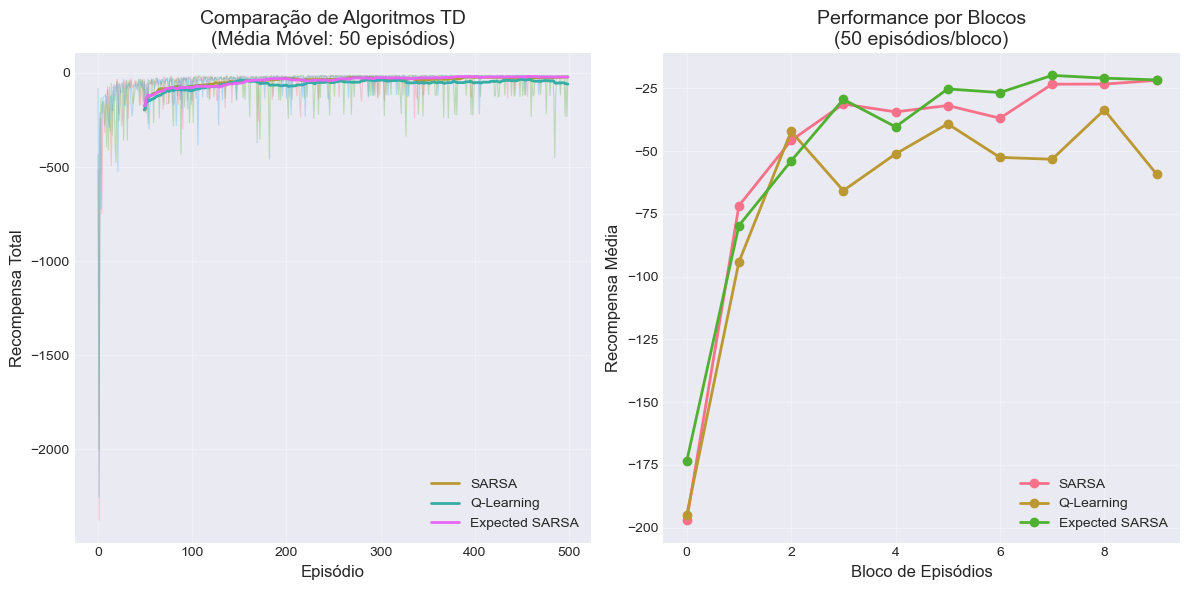


ESTAT√çSTICAS DE PERFORMANCE

SARSA:
  √öltimos 100 epis√≥dios - M√©dia: -22.57, Std: 18.36
  Todos epis√≥dios - M√©dia: -51.74, Min: -2377.00, Max: -15.00

Q-Learning:
  √öltimos 100 epis√≥dios - M√©dia: -46.36, Std: 68.88
  Todos epis√≥dios - M√©dia: -68.58, Min: -2005.00, Max: -13.00

Expected SARSA:
  √öltimos 100 epis√≥dios - M√©dia: -21.29, Std: 24.23
  Todos epis√≥dios - M√©dia: -49.12, Min: -2254.00, Max: -15.00


In [16]:
### 5.3 Compara√ß√£o de Performance


# Comparar curvas de aprendizado
rewards_dict = {
    'SARSA': rewards_sarsa,
    'Q-Learning': rewards_qlearning,
    'Expected SARSA': rewards_expected_sarsa
}

plot_learning_curve(rewards_dict, window=50, 
                   title="Compara√ß√£o de Algoritmos TD")


‚Üí Gerando visualiza√ß√µes de Q-values...



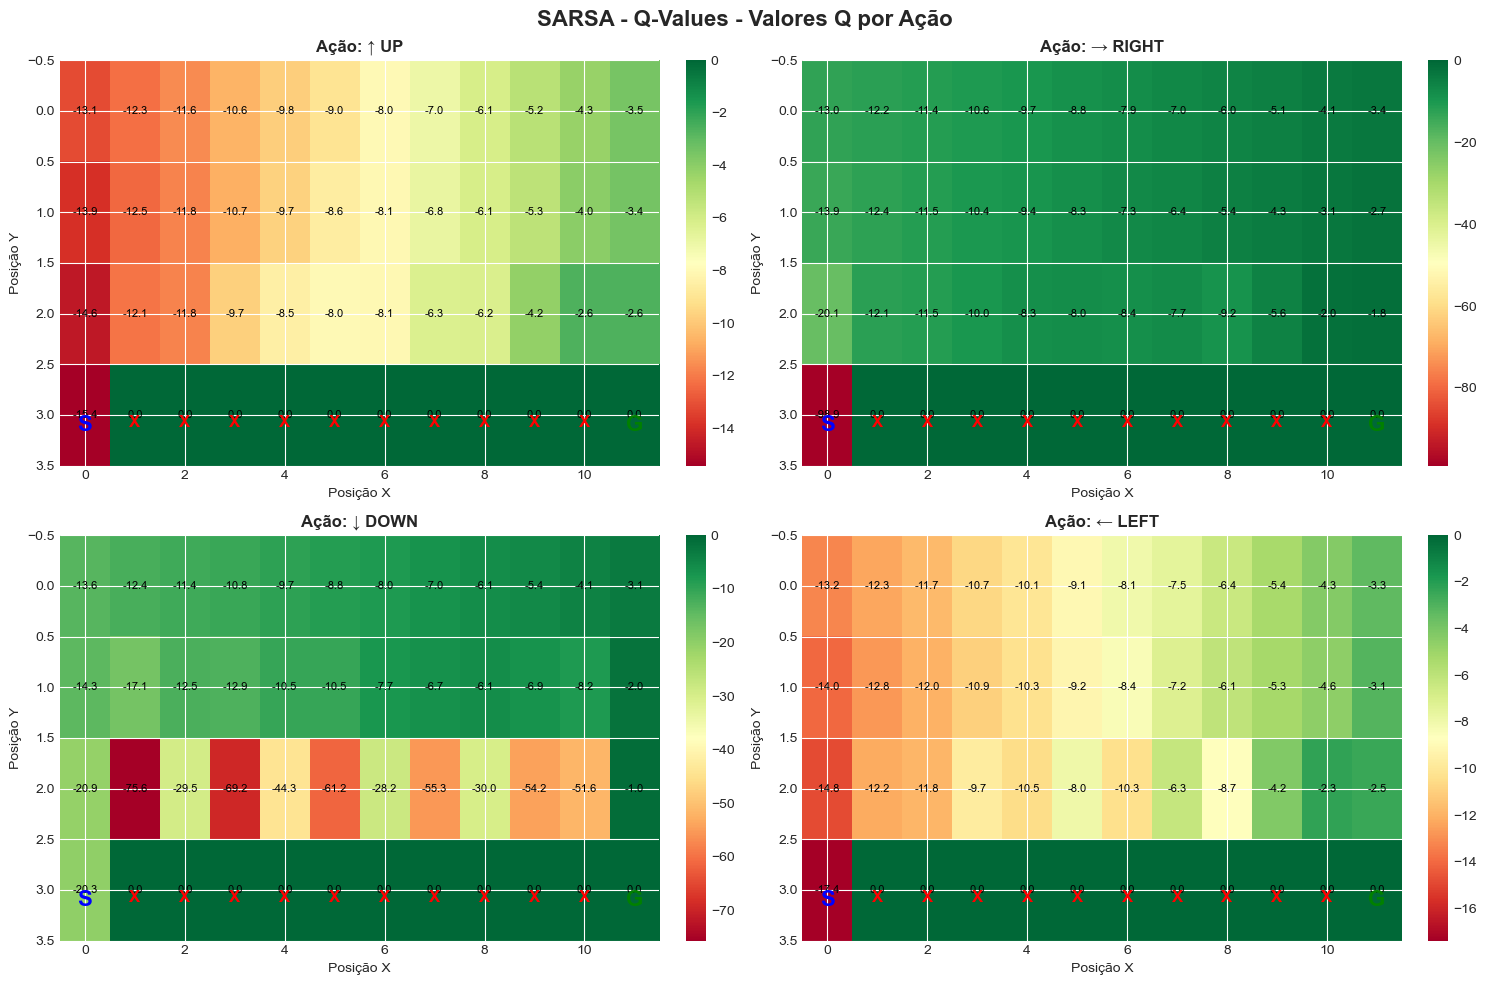

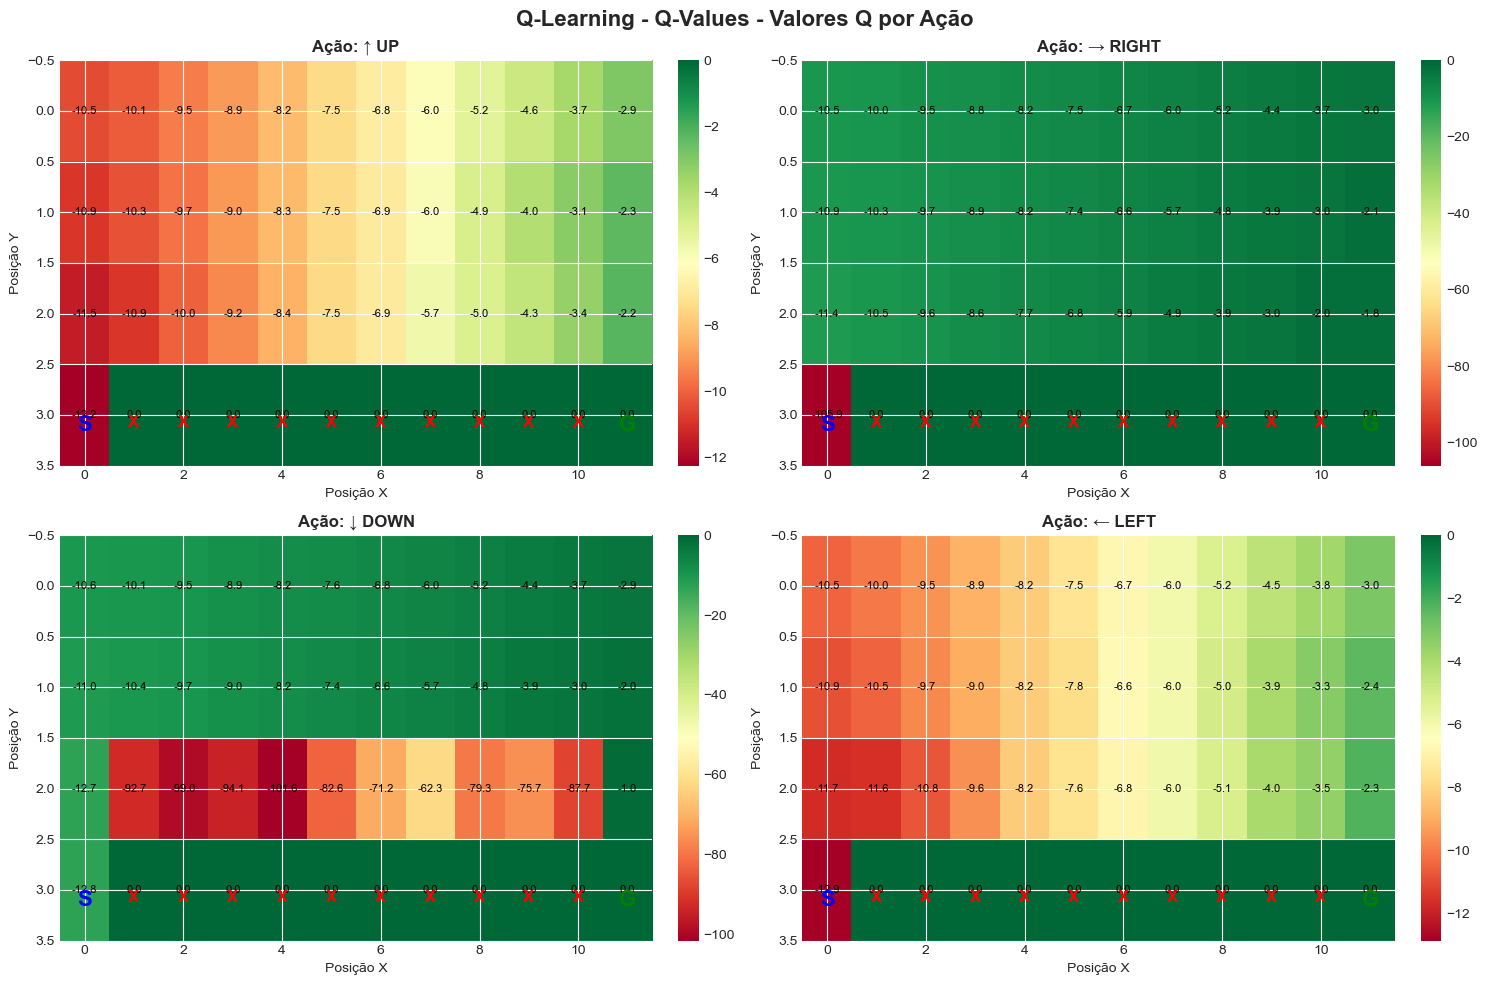

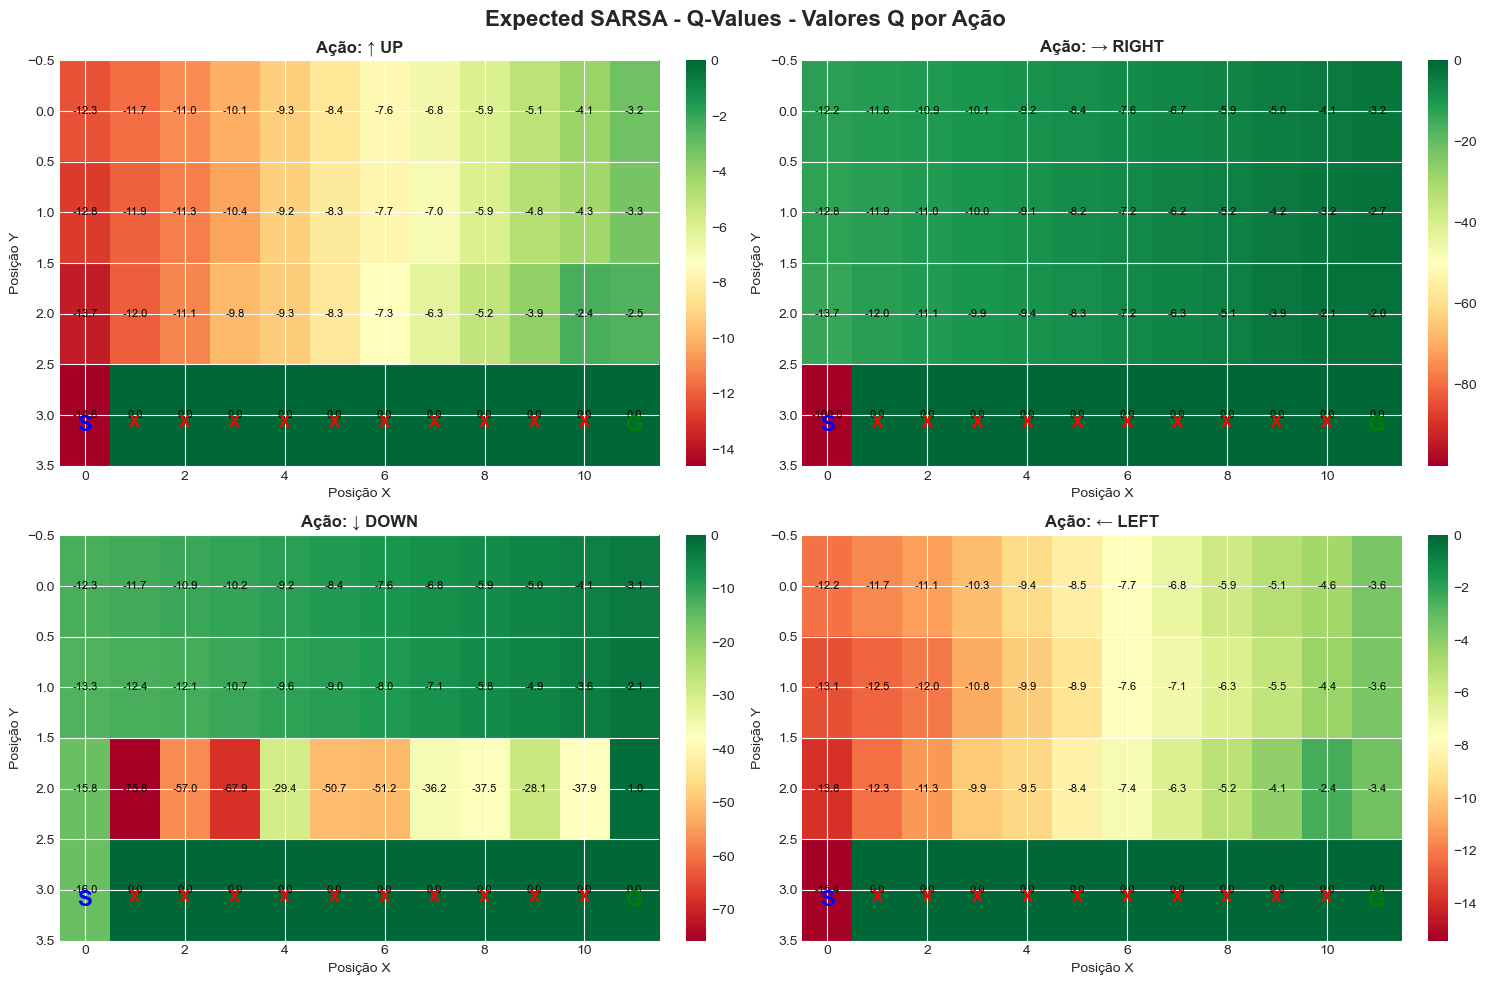

In [17]:
### 5.4 Visualiza√ß√£o de Q-values


# Visualizar Q-values para cada algoritmo
print("\n‚Üí Gerando visualiza√ß√µes de Q-values...\n")

plot_q_values_heatmap(Q_sarsa, title="SARSA - Q-Values")
plot_q_values_heatmap(Q_qlearning, title="Q-Learning - Q-Values")
plot_q_values_heatmap(Q_expected_sarsa, title="Expected SARSA - Q-Values")

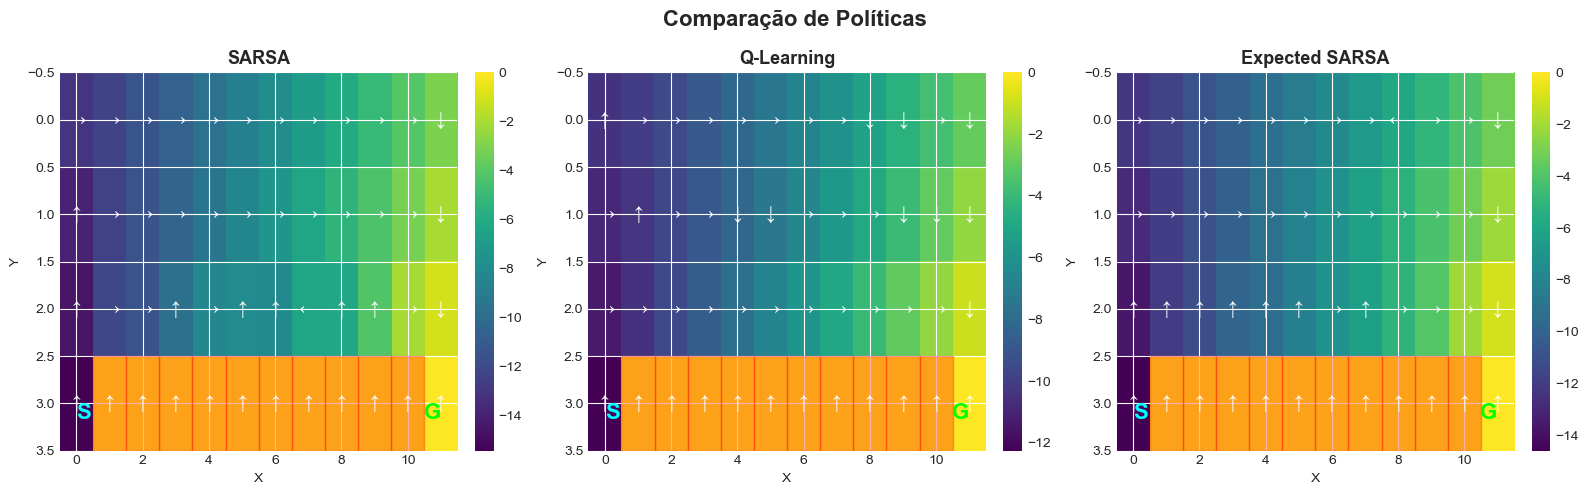


COMPARA√á√ÉO DE POL√çTICAS

SARSA vs Q-Learning:
  Estados com a√ß√µes diferentes: 16/48 (33.3%)

SARSA vs Expected SARSA:
  Estados com a√ß√µes diferentes: 9/48 (18.8%)

Q-Learning vs Expected SARSA:
  Estados com a√ß√µes diferentes: 15/48 (31.2%)


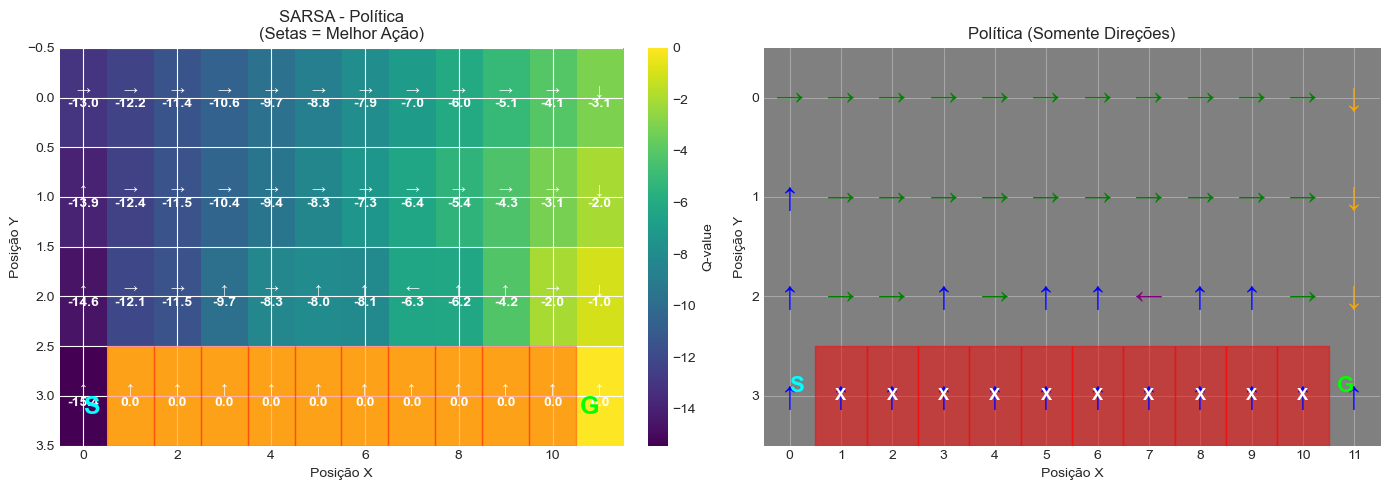


AN√ÅLISE DA POL√çTICA
A√ß√£o ‚Üë: 19 estados (39.6%)
A√ß√£o ‚Üí: 25 estados (52.1%)
A√ß√£o ‚Üì: 3 estados (6.2%)
A√ß√£o ‚Üê: 1 estados (2.1%)


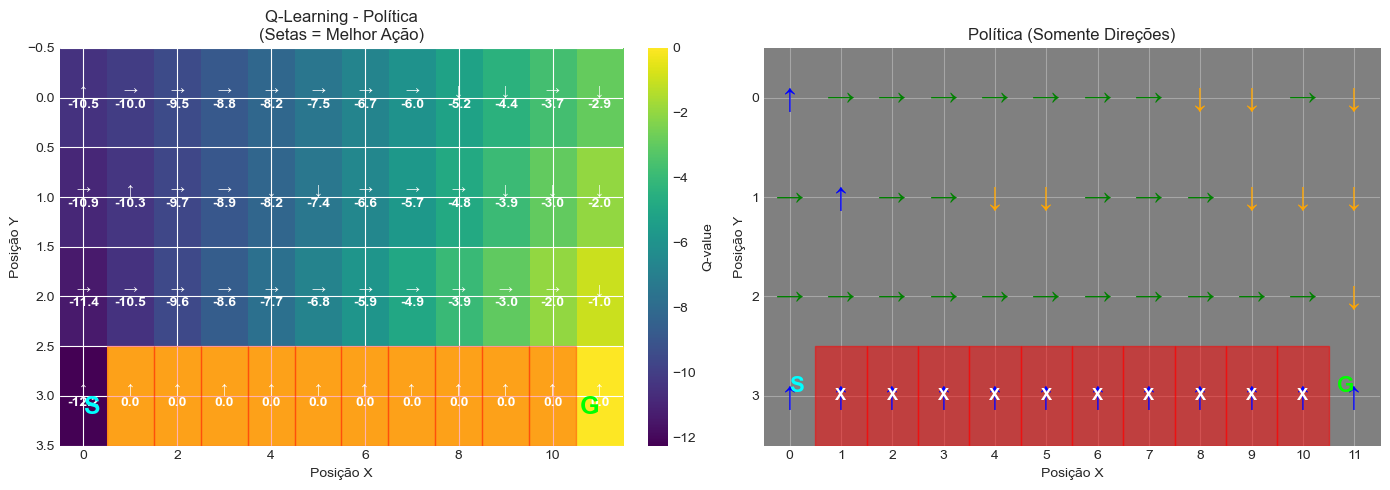


AN√ÅLISE DA POL√çTICA
A√ß√£o ‚Üë: 14 estados (29.2%)
A√ß√£o ‚Üí: 25 estados (52.1%)
A√ß√£o ‚Üì: 9 estados (18.8%)
A√ß√£o ‚Üê: 0 estados (0.0%)


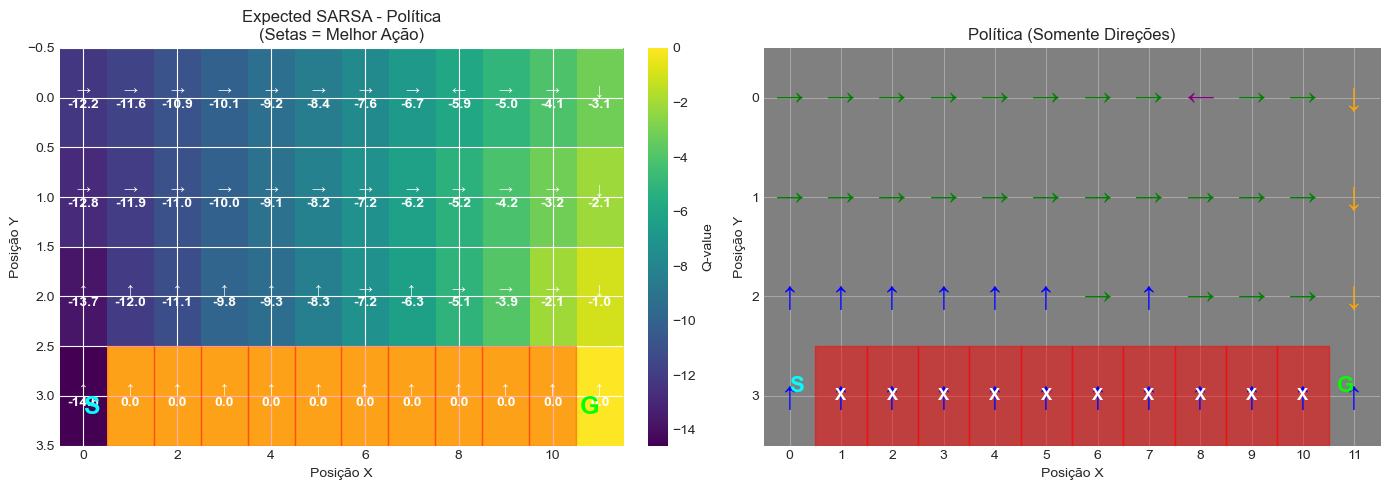


AN√ÅLISE DA POL√çTICA
A√ß√£o ‚Üë: 19 estados (39.6%)
A√ß√£o ‚Üí: 25 estados (52.1%)
A√ß√£o ‚Üì: 3 estados (6.2%)
A√ß√£o ‚Üê: 1 estados (2.1%)


In [18]:
### 5.5 Visualiza√ß√£o de Pol√≠ticas


# Comparar pol√≠ticas aprendidas
Q_dict = {
    'SARSA': Q_sarsa,
    'Q-Learning': Q_qlearning,
    'Expected SARSA': Q_expected_sarsa
}

compare_policies(Q_dict)

# Visualiza√ß√£o detalhada de cada pol√≠tica
plot_policy_heatmap(Q_sarsa, title="SARSA - Pol√≠tica")
plot_policy_heatmap(Q_qlearning, title="Q-Learning - Pol√≠tica")
plot_policy_heatmap(Q_expected_sarsa, title="Expected SARSA - Pol√≠tica")


‚Üí Simulando trajet√≥rias...



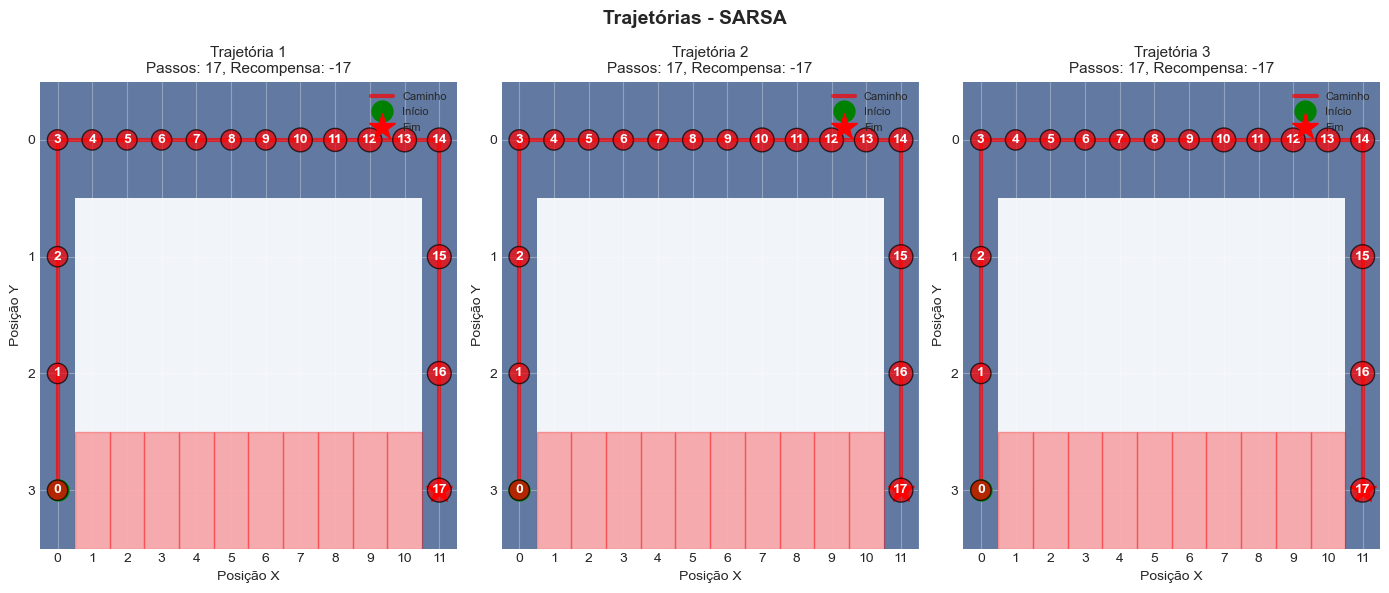


Trajet√≥ria executada com pol√≠tica greedy:
  N√∫mero de passos: 17
  Recompensa total: -17


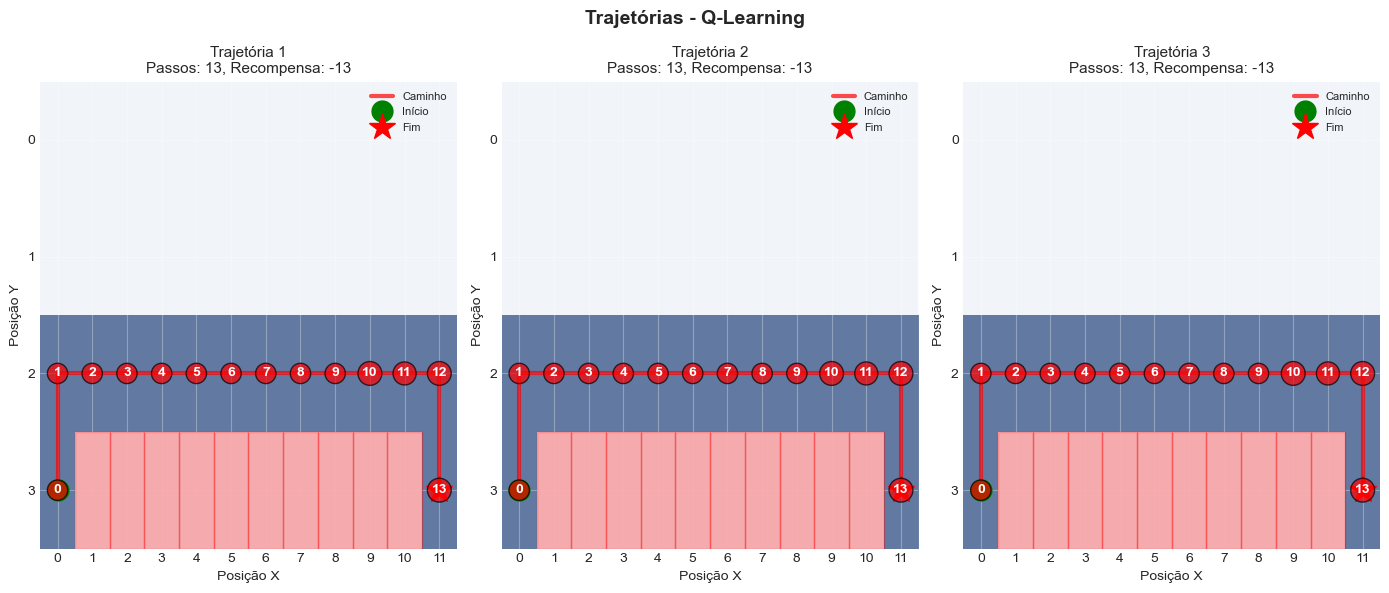


Trajet√≥ria executada com pol√≠tica greedy:
  N√∫mero de passos: 13
  Recompensa total: -13


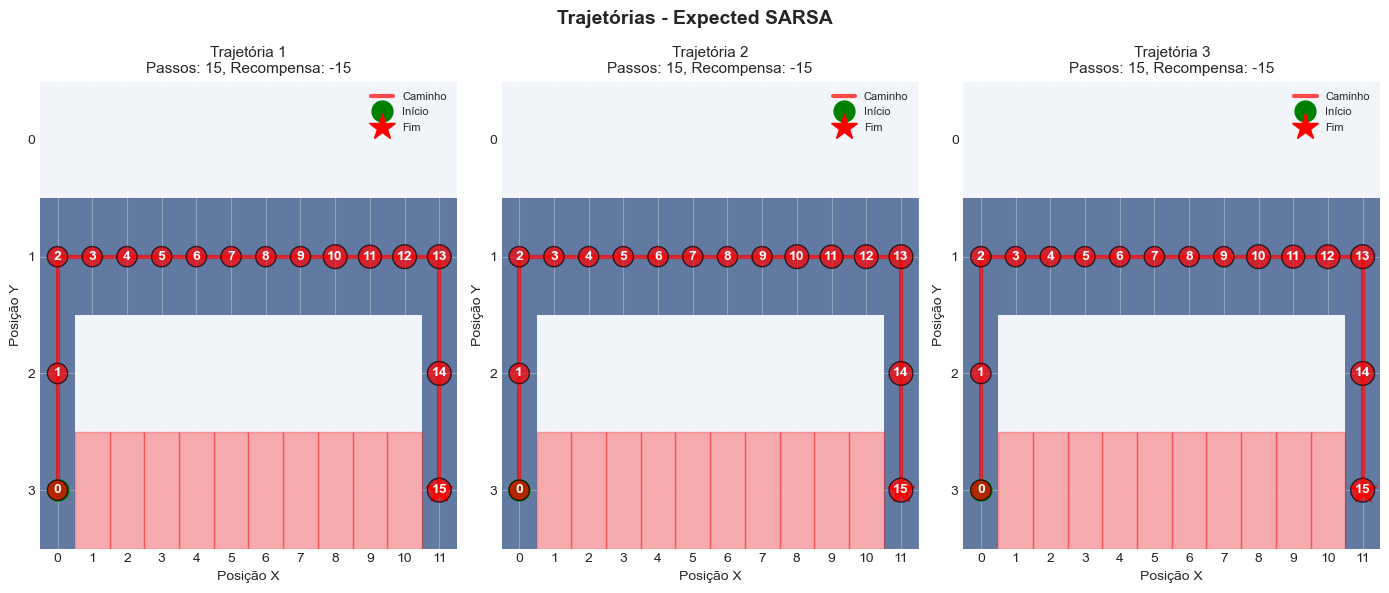


Trajet√≥ria executada com pol√≠tica greedy:
  N√∫mero de passos: 15
  Recompensa total: -15


In [19]:
### 5.6 Visualiza√ß√£o de Trajet√≥rias


# Simular trajet√≥rias usando as pol√≠ticas aprendidas
print("\n‚Üí Simulando trajet√≥rias...\n")

plot_trajectory(Q_sarsa, env, n_trajectories=3, 
               title="Trajet√≥rias - SARSA")
plot_trajectory(Q_qlearning, env, n_trajectories=3, 
               title="Trajet√≥rias - Q-Learning")
plot_trajectory(Q_expected_sarsa, env, n_trajectories=3, 
               title="Trajet√≥rias - Expected SARSA")


AN√ÅLISE DE SENSIBILIDADE - ALPHA

AN√ÅLISE DE SENSIBILIDADE: ALPHA
Algoritmo: SARSA

Testando alpha = 0.01...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -89.98

Testando alpha = 0.05...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -27.64

Testando alpha = 0.1...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -21.76

Testando alpha = 0.3...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -24.86

Testando alpha = 0.5...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -29.56

Testando alpha = 0.7...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -37.93

Testando alpha = 1.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -111.52



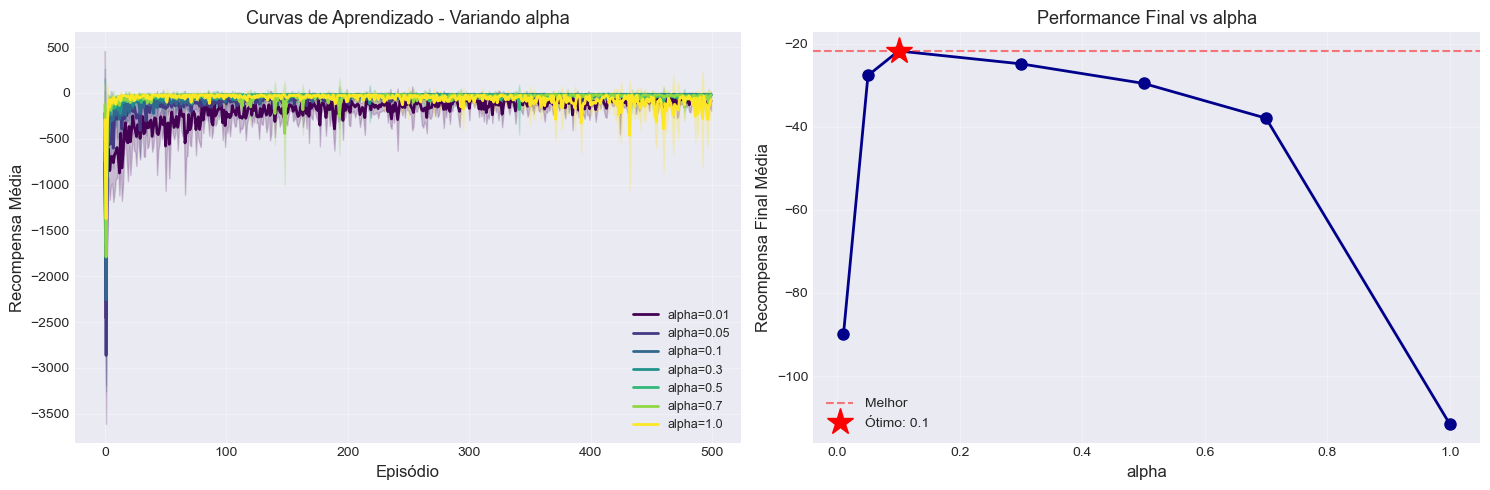


SUM√ÅRIO DA AN√ÅLISE
Melhor alpha: 0.1
Recompensa com melhor alpha: -21.76


AN√ÅLISE DE SENSIBILIDADE: ALPHA
Algoritmo: Q-Learning

Testando alpha = 0.01...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -107.23

Testando alpha = 0.05...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -47.82

Testando alpha = 0.1...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -53.43

Testando alpha = 0.3...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -54.56

Testando alpha = 0.5...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -53.88

Testando alpha = 0.7...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -51.56

Testando alpha = 1.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -43.68



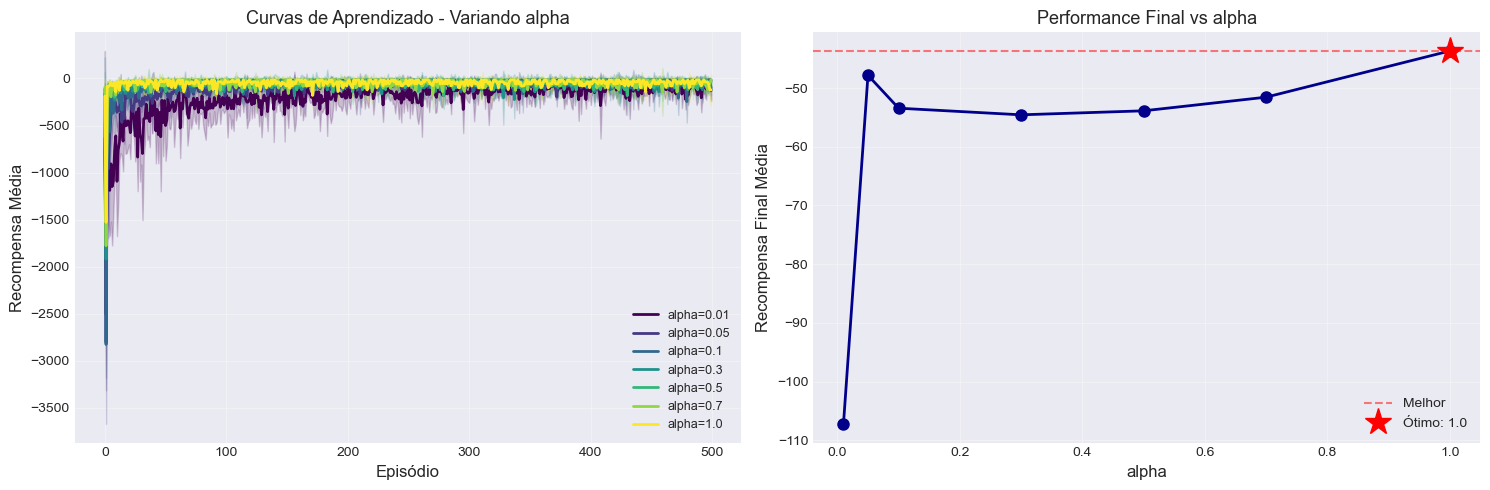


SUM√ÅRIO DA AN√ÅLISE
Melhor alpha: 1.0
Recompensa com melhor alpha: -43.68


AN√ÅLISE DE SENSIBILIDADE: ALPHA
Algoritmo: Expected SARSA

Testando alpha = 0.01...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -92.11

Testando alpha = 0.05...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -28.87

Testando alpha = 0.1...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -20.61

Testando alpha = 0.3...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -20.53

Testando alpha = 0.5...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -21.10

Testando alpha = 0.7...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -21.95

Testando alpha = 1.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -21.39



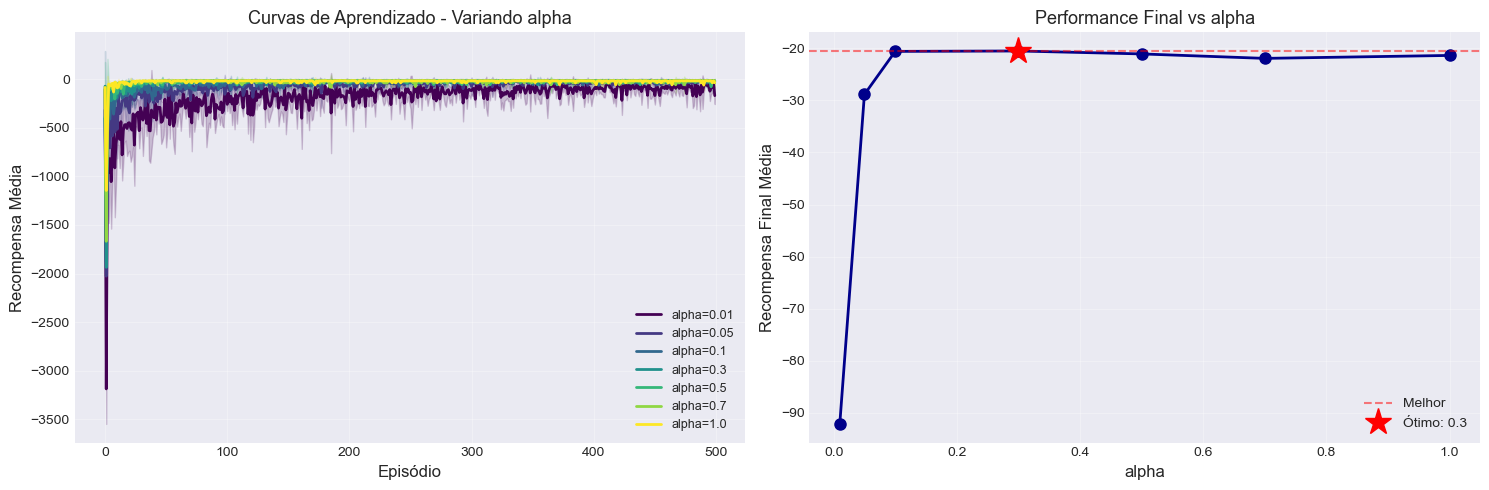


SUM√ÅRIO DA AN√ÅLISE
Melhor alpha: 0.3
Recompensa com melhor alpha: -20.53



In [20]:
### 5.7 An√°lise de Sensibilidade


# Exemplo 1: An√°lise do par√¢metro alpha (taxa de aprendizado)
print("\n" + "="*70)
print("AN√ÅLISE DE SENSIBILIDADE - ALPHA")
print("="*70)

alpha_values = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0]

results_alpha_sarsa = parameter_sensitivity_analysis(
    env, sarsa, 'SARSA', 'alpha', alpha_values,
    n_episodes=500, n_runs=5
)

results_alpha_qlearning = parameter_sensitivity_analysis(
    env, q_learning, 'Q-Learning', 'alpha', alpha_values,
    n_episodes=500, n_runs=5
)

results_alpha_expected = parameter_sensitivity_analysis(
    env, expected_sarsa, 'Expected SARSA', 'alpha', alpha_values,
    n_episodes=500, n_runs=5
)


AN√ÅLISE DE SENSIBILIDADE - EPSILON

AN√ÅLISE DE SENSIBILIDADE: EPSILON
Algoritmo: SARSA

Testando epsilon = 0.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -13.00

Testando epsilon = 0.01...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -17.21

Testando epsilon = 0.05...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -19.96

Testando epsilon = 0.1...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -22.92

Testando epsilon = 0.2...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -30.84

Testando epsilon = 0.3...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -42.22

Testando epsilon = 0.5...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -91.45



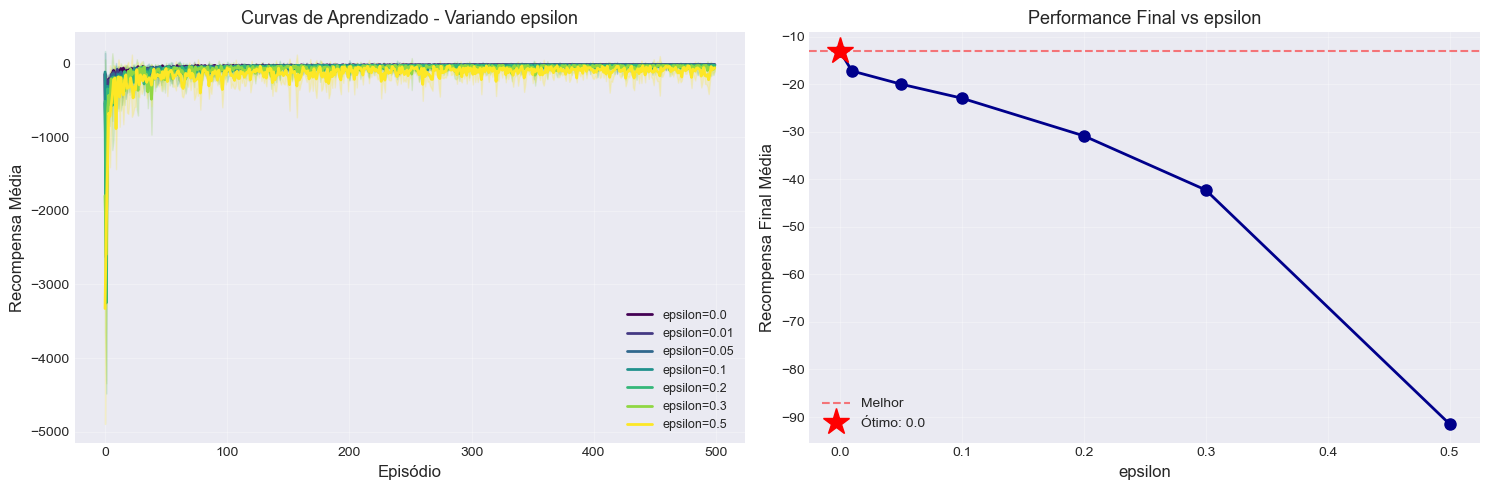


SUM√ÅRIO DA AN√ÅLISE
Melhor epsilon: 0.0
Recompensa com melhor epsilon: -13.00



In [21]:
# Exemplo 2: An√°lise do par√¢metro epsilon (explora√ß√£o)
print("\n" + "="*70)
print("AN√ÅLISE DE SENSIBILIDADE - EPSILON")
print("="*70)

epsilon_values = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

results_epsilon_sarsa = parameter_sensitivity_analysis(
    env, sarsa, 'SARSA', 'epsilon', epsilon_values,
    n_episodes=500, n_runs=5
)


AN√ÅLISE DE SENSIBILIDADE: EPSILON
Algoritmo: E-SARSA

Testando epsilon = 0.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -13.00

Testando epsilon = 0.01...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -17.55

Testando epsilon = 0.05...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -19.28

Testando epsilon = 0.1...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -21.55

Testando epsilon = 0.2...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -30.24

Testando epsilon = 0.3...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -43.77

Testando epsilon = 0.5...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -88.93



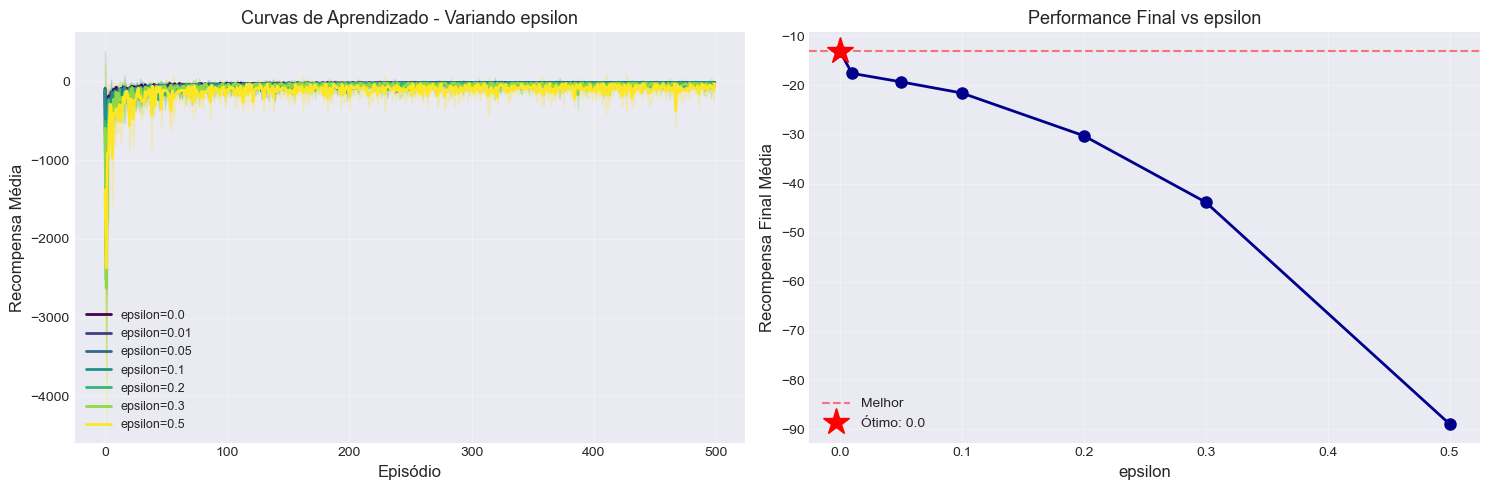


SUM√ÅRIO DA AN√ÅLISE
Melhor epsilon: 0.0
Recompensa com melhor epsilon: -13.00



In [23]:
results_epsilon_sarsa = parameter_sensitivity_analysis(
    env, expected_sarsa, 'E-SARSA', 'epsilon', epsilon_values,
    n_episodes=500, n_runs=5
)


AN√ÅLISE DE SENSIBILIDADE: EPSILON
Algoritmo: Q-Learning

Testando epsilon = 0.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -13.00

Testando epsilon = 0.01...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -16.66

Testando epsilon = 0.05...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -28.90

Testando epsilon = 0.1...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -42.57

Testando epsilon = 0.2...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -94.73

Testando epsilon = 0.3...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -174.52

Testando epsilon = 0.5...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -393.42



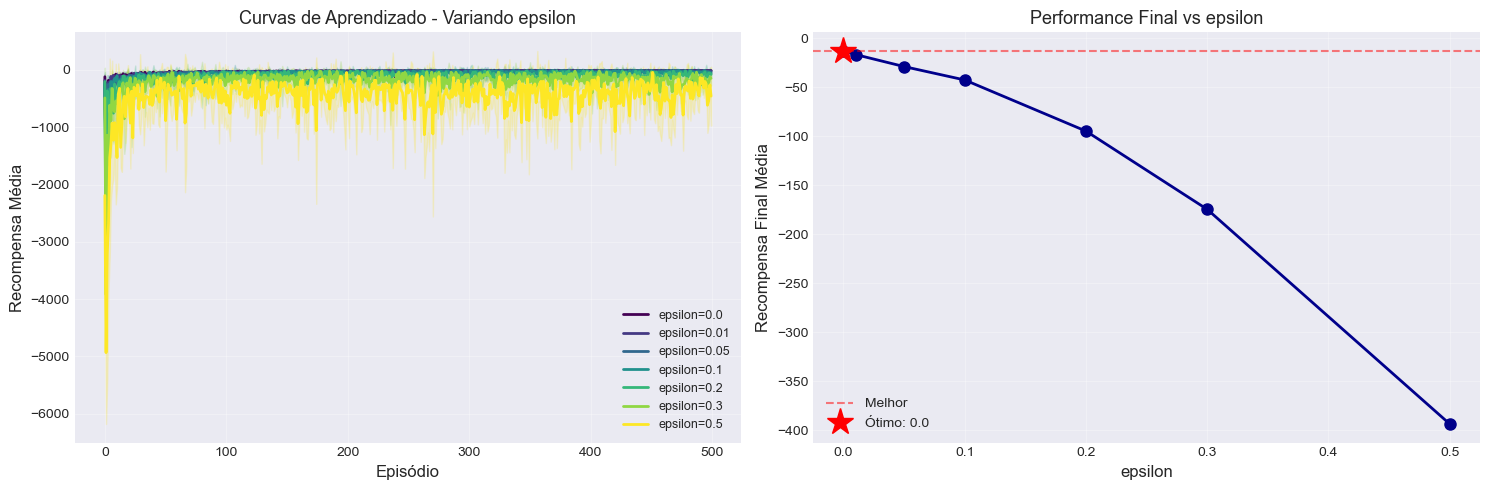


SUM√ÅRIO DA AN√ÅLISE
Melhor epsilon: 0.0
Recompensa com melhor epsilon: -13.00



In [24]:
results_epsilon_sarsa = parameter_sensitivity_analysis(
    env, q_learning, 'Q-Learning', 'epsilon', epsilon_values,
    n_episodes=500, n_runs=5
)


AN√ÅLISE DE SENSIBILIDADE - GAMMA

AN√ÅLISE DE SENSIBILIDADE: GAMMA
Algoritmo: Q-Learning

Testando gamma = 0.5...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -51.88

Testando gamma = 0.7...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -48.37

Testando gamma = 0.9...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -50.37

Testando gamma = 0.95...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -47.33

Testando gamma = 0.99...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -51.86

Testando gamma = 0.999...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -50.98



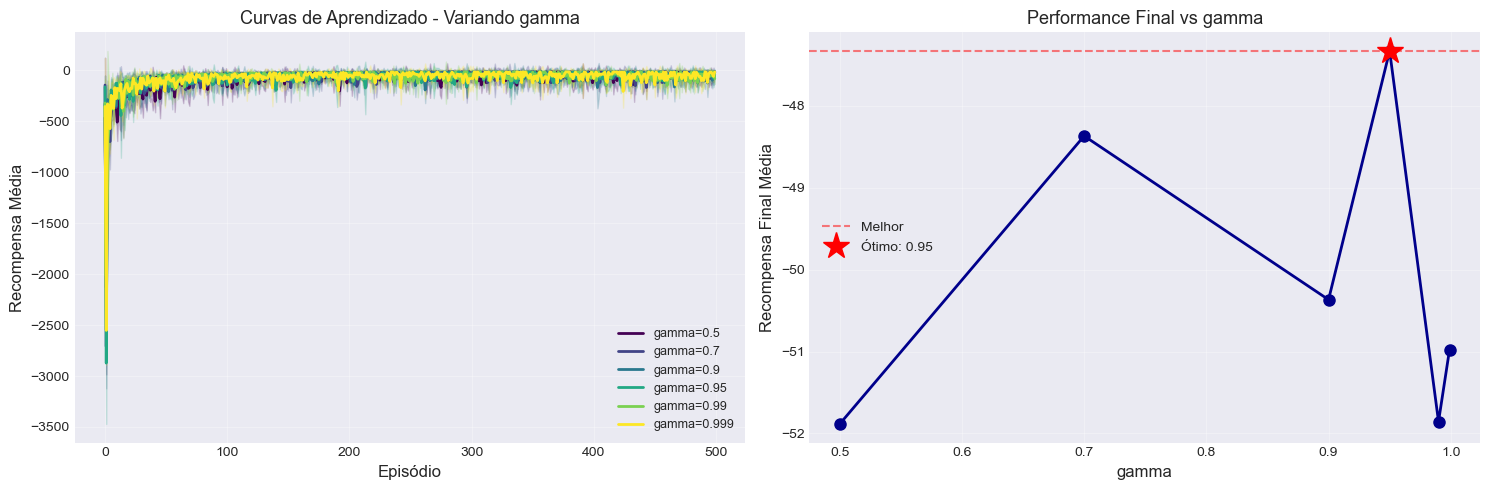


SUM√ÅRIO DA AN√ÅLISE
Melhor gamma: 0.95
Recompensa com melhor gamma: -47.33



In [25]:
# Exemplo 3: An√°lise do par√¢metro gamma (desconto)
print("\n" + "="*70)
print("AN√ÅLISE DE SENSIBILIDADE - GAMMA")
print("="*70)

gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99, 0.999]

results_gamma_qlearning = parameter_sensitivity_analysis(
    env, q_learning, 'Q-Learning', 'gamma', gamma_values,
    n_episodes=500, n_runs=5
)


AN√ÅLISE DE SENSIBILIDADE - Q_INIT (Inicializa√ß√£o Otimista)

AN√ÅLISE DE SENSIBILIDADE: Q_INIT
Algoritmo: Expected SARSA

Testando q_init = -10.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -22.93

Testando q_init = -5.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -22.79

Testando q_init = 0.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -20.76

Testando q_init = 5.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -22.77

Testando q_init = 10.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -21.33

Testando q_init = 20.0...
  ‚úì Recompensa final m√©dia (√∫ltimos 100 ep.): -22.31



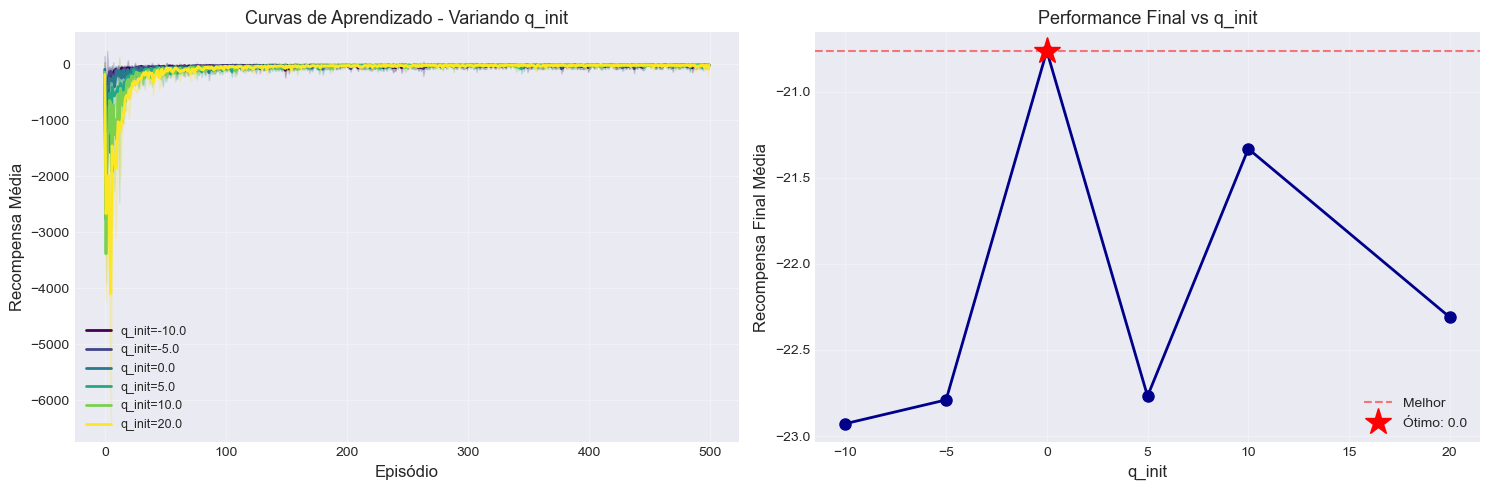


SUM√ÅRIO DA AN√ÅLISE
Melhor q_init: 0.0
Recompensa com melhor q_init: -20.76



In [26]:
# Exemplo 4: An√°lise do valor inicial Q(s,a)
print("\n" + "="*70)
print("AN√ÅLISE DE SENSIBILIDADE - Q_INIT (Inicializa√ß√£o Otimista)")
print("="*70)

q_init_values = [-10.0, -5.0, 0.0, 5.0, 10.0, 20.0]

results_qinit_expected = parameter_sensitivity_analysis(
    env, expected_sarsa, 'Expected SARSA', 'q_init', q_init_values,
    n_episodes=500, n_runs=5
)

## 6. Discuss√£o dos Resultados

### 6.1 Comportamento Esperado no Cliff Walking

**SARSA (On-Policy):**
- Aprende um caminho **seguro** pela linha superior do grid
- Durante o aprendizado, ocasionalmente cai no precip√≠cio devido √† explora√ß√£o Œµ
- Como √© on-policy, leva em conta essas quedas na atualiza√ß√£o dos Q-values
- Resultado: aprende a **evitar** o precip√≠cio, mesmo que isso signifique um caminho mais longo
- Performance interina: **melhor** que Q-Learning (menos quedas)
- Performance assint√≥tica: **sub√≥tima** mas segura

**Q-Learning (Off-Policy):**
- Aprende o caminho **√≥timo** (mais curto) ao longo da borda do precip√≠cio
- Durante o aprendizado, cai no precip√≠cio com frequ√™ncia devido √† explora√ß√£o
- Como √© off-policy, sempre atualiza considerando a melhor a√ß√£o (ignorando explora√ß√£o)
- Resultado: aprende o caminho √≥timo, mas **perigoso** durante treinamento
- Performance interina: **pior** que SARSA (muitas quedas)
- Performance assint√≥tica: **√≥tima**

**Expected SARSA:**
- Aprende o caminho **√≥timo** como Q-Learning
- Durante o aprendizado, tem performance **intermedi√°ria**
- Usa expectativa sobre a√ß√µes, reduzindo vari√¢ncia
- Resultado: **melhor de ambos** - aprende √≥timo com menos quedas
- Performance interina: **melhor** que ambos
- Performance assint√≥tica: **√≥tima**
- **Mais est√°vel** com diferentes valores de Œ±

---

### 6.2 Efeitos dos Hiperpar√¢metros

#### 6.2.1 Taxa de Aprendizado (Œ±)

**Efeito:**
- **Œ± pequeno (0.01-0.05)**: Aprendizado lento mas est√°vel, requer muitos epis√≥dios
- **Œ± m√©dio (0.1-0.3)**: Bom balan√ßo entre velocidade e estabilidade
- **Œ± grande (0.5-1.0)**: Aprendizado r√°pido mas pode oscilar

**Observa√ß√µes por algoritmo:**
- **SARSA**: Sens√≠vel a Œ± alto (pode instabilizar)
- **Q-Learning**: Similar ao SARSA
- **Expected SARSA**: Tolera Œ± maior (at√© 1.0) sem instabilidade - **vantagem importante!**

**Recomenda√ß√£o:**
- Comece com Œ± = 0.1
- Para Expected SARSA, pode usar Œ± = 0.5 ou maior
- Em ambientes determin√≠sticos, Expected SARSA com Œ± = 1.0 pode funcionar bem

#### 6.2.2 Fator de Desconto (Œ≥)

**Efeito:**
- **Œ≥ baixo (0.5-0.7)**: Agente m√≠ope, foca em recompensas imediatas
- **Œ≥ alto (0.9-0.99)**: Agente valoriza recompensas futuras, planeja melhor
- **Œ≥ muito alto (0.999)**: Pode dificultar converg√™ncia

**No Cliff Walking:**
- Œ≥ baixo: pode n√£o aprender a evitar precip√≠cio adequadamente
- Œ≥ alto: aprende melhor a estrat√©gia completa at√© o objetivo
- Valor t√≠pico recomendado: **0.99**

#### 6.2.3 Explora√ß√£o (Œµ)

**Efeito:**
- **Œµ = 0** (greedy): Sem explora√ß√£o, pode ficar preso em √≥timo local
- **Œµ pequeno (0.01-0.05)**: Pouca explora√ß√£o, converg√™ncia r√°pida mas pode perder √≥timo global
- **Œµ m√©dio (0.1-0.2)**: Bom balan√ßo explora√ß√£o/exploitation
- **Œµ grande (0.3-0.5)**: Muita explora√ß√£o, aprendizado lento

**Estrat√©gia comum:**
- Usar **Œµ-decay**: come√ßar com Œµ alto (0.3) e decair para Œµ baixo (0.01)
- No Cliff Walking, Œµ = 0.1 funciona bem

**Diferen√ßa entre algoritmos:**
- **SARSA**: Mais sens√≠vel a Œµ (afeta diretamente a pol√≠tica aprendida)
- **Q-Learning**: Menos sens√≠vel a Œµ (off-policy)
- **Expected SARSA**: Incorpora Œµ na expectativa

#### 6.2.4 Inicializa√ß√£o Otimista (q_init)

**Efeito:**
- **q_init = 0**: Padr√£o, sem vi√©s inicial
- **q_init > 0** (otimista): Encoraja explora√ß√£o inicial (estados n√£o visitados parecem promissores)
- **q_init < 0** (pessimista): Desencoraja explora√ß√£o

**Uso:**
- Inicializa√ß√£o otimista (q_init = 5 a 10) pode **acelerar explora√ß√£o** inicial
- √ötil quando Œµ √© baixo
- No Cliff Walking: q_init = 0 funciona bem (explora√ß√£o j√° controlada por Œµ)

---

## 7. Dicas Pr√°ticas e Troubleshooting

### 7.1 Escolha do Algoritmo

```python
"""
GUIA DE ESCOLHA:

Use SARSA quando:
‚úì Seguran√ßa durante aprendizado √© CR√çTICA
‚úì Custo de falhas √© alto (rob√≥tica, sistemas reais)
‚úì Prefere pol√≠tica conservadora
‚úì Explora√ß√£o pode ser perigosa

Use Q-Learning quando:
‚úì Quer descobrir pol√≠tica √ìTIMA
‚úì Pode tolerar performance ruim no in√≠cio
‚úì Ambiente √© simula√ß√£o/jogo
‚úì Simplicidade conceitual importa

Use Expected SARSA quando:
‚úì Quer MELHOR performance geral (recomendado!)
‚úì Pode arcar com custo computacional O(|A|)
‚úì Estabilidade √© importante
‚úì Maioria dos casos pr√°ticos
"""
```

### 7.2 Problemas Comuns

```python
"""
PROBLEMA 1: Q-values n√£o convergem, oscilam muito
SOLU√á√ÉO:
- Reduzir Œ± (taxa de aprendizado)
- Aumentar n√∫mero de epis√≥dios
- Verificar se ambiente √© estoc√°stico demais

PROBLEMA 2: Agente fica preso em √≥timo local
SOLU√á√ÉO:
- Aumentar Œµ (mais explora√ß√£o)
- Usar inicializa√ß√£o otimista (q_init > 0)
- Aumentar n√∫mero de epis√≥dios

PROBLEMA 3: Aprendizado muito lento
SOLU√á√ÉO:
- Aumentar Œ± (com cuidado para n√£o instabilizar)
- Verificar se Œ≥ n√£o est√° muito baixo
- Considerar usar Expected SARSA (mais eficiente)

PROBLEMA 4: Performance assint√≥tica ruim
SOLU√á√ÉO:
- Verificar se Œµ n√£o est√° muito alto (reduzir Œµ no final)
- Aumentar Œ≥ (considerar recompensas futuras)
- Treinar por mais epis√≥dios

PROBLEMA 5: SARSA vs Q-Learning d√£o resultados iguais
SOLU√á√ÉO:
- Isso pode acontecer se Œµ for muito baixo
- Aumente Œµ para ver diferen√ßa de comportamento
- Em ambientes determin√≠sticos, podem convergir para o mesmo
"""
```

### 7.3 Boas Pr√°ticas

```python
"""
BOAS PR√ÅTICAS:

1. SEMPRE plotar curvas de aprendizado
   - Identifica problemas de converg√™ncia
   - Mostra se algoritmo est√° melhorando

2. Usar m√©dia m√≥vel para suavizar gr√°ficos
   - Facilita visualiza√ß√£o de tend√™ncias
   - Window = 50 a 100 epis√≥dios

3. Executar m√∫ltiplas vezes (seeds diferentes)
   - Calcula m√©dia e desvio padr√£o
   - Resultados mais confi√°veis

4. Come√ßar com valores padr√£o
   - Œ± = 0.1, Œ≥ = 0.99, Œµ = 0.1
   - Depois fazer an√°lise de sensibilidade

5. Visualizar Q-values e pol√≠tica
   - Entender o que o agente aprendeu
   - Debugar comportamentos estranhos

6. Testar pol√≠tica sem explora√ß√£o (Œµ = 0)
   - Ver performance real da pol√≠tica aprendida
   - Separar efeito da explora√ß√£o

7. Comparar com baseline
   - Pol√≠tica aleat√≥ria
   - Pol√≠tica manual (se dispon√≠vel)
"""
```

---

## 8. Extens√µes e Experimentos Avan√ßados

### 8.1 Œµ-Decay (Explora√ß√£o Decrescente)

```python
def sarsa_with_epsilon_decay(env: gym.Env,
                             n_episodes: int = 500,
                             alpha: float = 0.1,
                             gamma: float = 0.99,
                             epsilon_start: float = 1.0,
                             epsilon_end: float = 0.01,
                             epsilon_decay: float = 0.995,
                             q_init: float = 0.0) -> Tuple[np.ndarray, List[float], List[float]]:
    """
    SARSA com decaimento de epsilon ao longo do treinamento.
    
    Estrat√©gia: Explorar muito no in√≠cio, explorar pouco no final.
    
    Retorna:
    --------
    Tuple[np.ndarray, List[float], List[float]]
        - Q: Tabela Q aprendida
        - episode_rewards: Recompensas por epis√≥dio
        - epsilon_history: Valores de epsilon ao longo do tempo
    """
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.full((n_states, n_actions), q_init, dtype=np.float64)
    
    episode_rewards = []
    epsilon_history = []
    epsilon = epsilon_start
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon, n_actions)
        
        total_reward = 0
        done = False
        
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
            if not done:
                next_action = epsilon_greedy_policy(Q, next_state, epsilon, n_actions)
                td_target = reward + gamma * Q[next_state, next_action]
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
                state, action = next_state, next_action
            else:
                td_target = reward
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
        
        episode_rewards.append(total_reward)
        epsilon_history.append(epsilon)
        
        # Decair epsilon
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
    
    return Q, episode_rewards, epsilon_history


# Exemplo de uso:
# Q, rewards, eps_hist = sarsa_with_epsilon_decay(env, n_episodes=1000)
# 
# # Plotar epsilon ao longo do tempo
# plt.figure(figsize=(10, 4))
# plt.plot(eps_hist)
# plt.xlabel('Epis√≥dio')
# plt.ylabel('Epsilon')
# plt.title('Decaimento de Epsilon')
# plt.grid(True)
# plt.show()
```

### 8.2 Compara√ß√£o com Pol√≠tica Aleat√≥ria (Baseline)

```python
def random_policy_baseline(env: gym.Env, 
                          n_episodes: int = 100) -> List[float]:
    """
    Avalia performance de uma pol√≠tica completamente aleat√≥ria.
    Serve como baseline para compara√ß√£o.
    """
    episode_rewards = []
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            action = env.action_space.sample()  # A√ß√£o aleat√≥ria
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            state = next_state
        
        episode_rewards.append(total_reward)
    
    return episode_rewards


# Exemplo de uso:
# random_rewards = random_policy_baseline(env, n_episodes=500)
# 
# # Comparar com algoritmos treinados
# plt.figure(figsize=(12, 6))
# plt.plot(random_rewards, label='Pol√≠tica Aleat√≥ria', alpha=0.5)
# plt.plot(rewards_sarsa, label='SARSA', alpha=0.7)
# plt.plot(rewards_qlearning, label='Q-Learning', alpha=0.7)
# plt.xlabel('Epis√≥dio')
# plt.ylabel('Recompensa Total')
# plt.title('Compara√ß√£o com Baseline Aleat√≥rio')
# plt.legend()
# plt.grid(True)
# plt.show()
# 
# print(f"Pol√≠tica Aleat√≥ria - M√©dia: {np.mean(random_rewards):.2f}")
# print(f"SARSA - M√©dia: {np.mean(rewards_sarsa[-100:]):.2f}")
# print(f"Q-Learning - M√©dia: {np.mean(rewards_qlearning[-100:]):.2f}")
```

### 8.3 An√°lise de Converg√™ncia

```python
def analyze_convergence(Q_history: List[np.ndarray],
                       window: int = 10) -> Dict:
    """
    Analisa a converg√™ncia da tabela Q ao longo do treinamento.
    
    Requer modificar os algoritmos para salvar Q a cada N epis√≥dios.
    
    Retorna m√©tricas de converg√™ncia:
    - Delta m√©dio (mudan√ßa em Q)
    - N√∫mero de estados com Q est√°vel
    """
    deltas = []
    
    for i in range(1, len(Q_history)):
        delta = np.mean(np.abs(Q_history[i] - Q_history[i-1]))
        deltas.append(delta)
    
    # Suavizar com m√©dia m√≥vel
    if len(deltas) >= window:
        smoothed_deltas = np.convolve(deltas, np.ones(window)/window, mode='valid')
    else:
        smoothed_deltas = deltas
    
    # Plotar
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(deltas, alpha=0.3, label='Delta bruto')
    plt.plot(range(window-1, len(deltas)), smoothed_deltas, 
            label=f'M√©dia m√≥vel (janela={window})', linewidth=2)
    plt.xlabel('Checkpoint')
    plt.ylabel('|Q_t - Q_{t-1}| m√©dio')
    plt.title('Converg√™ncia da Tabela Q')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    plt.subplot(1, 2, 2)
    final_Q = Q_history[-1]
    plt.hist(final_Q.flatten(), bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Q-value')
    plt.ylabel('Frequ√™ncia')
    plt.title('Distribui√ß√£o de Q-values Finais')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'deltas': deltas,
        'final_mean_delta': deltas[-1] if deltas else 0,
        'converged': deltas[-1] < 0.01 if deltas else False
    }
```

---

## 9. Resumo e Conclus√µes

### 9.1 Principais Aprendizados

**Sobre os Algoritmos:**

1. **SARSA** √© ideal quando seguran√ßa importa mais que otimalidade
2. **Q-Learning** √© ideal quando voc√™ quer a pol√≠tica √≥tima e pode tolerar falhas durante treinamento
3. **Expected SARSA** √© geralmente a melhor escolha: combina estabilidade e otimalidade

**Sobre os Hiperpar√¢metros:**

1. **Œ± (learning rate)**: Comece com 0.1, Expected SARSA tolera valores maiores
2. **Œ≥ (discount)**: Use 0.99 para a maioria dos problemas
3. **Œµ (exploration)**: Use 0.1, considere Œµ-decay para problemas complexos
4. **Inicializa√ß√£o**: q_init = 0 funciona bem, valores otimistas podem acelerar explora√ß√£o

**Sobre o Cliff Walking:**

1. SARSA aprende caminho seguro (linha superior)
2. Q-Learning e Expected SARSA aprendem caminho √≥timo (beirando cliff)
3. Expected SARSA tem melhor performance durante treinamento

### 9.2 Equa√ß√µes-Chave

**SARSA:**
$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]$

**Q-Learning:**
$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t)]$

**Expected SARSA:**
$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \sum_a \pi(a|S_{t+1}) Q(S_{t+1}, a) - Q(S_t, A_t)]$

### 9.3 Quando Usar Cada M√©todo

| Crit√©rio | SARSA | Q-Learning | Expected SARSA |
|----------|-------|------------|----------------|
| **Seguran√ßa** | ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê‚≠ê |
| **Otimalidade** | ‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê |
| **Estabilidade** | ‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê |
| **Velocidade** | ‚≠ê‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê |
| **Simplicidade** | ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê‚≠ê | ‚≠ê‚≠ê‚≠ê |

---

## 10. Refer√™ncias

### Bibliogr√°ficas

1. **Sutton, R. S., & Barto, A. G. (2020).** *Reinforcement Learning: An Introduction* (2nd ed.). MIT Press.
   - Cap√≠tulo 6: Temporal-Difference Learning
   - Se√ß√£o 6.6: Expected SARSA

2. **Watkins, C. J. C. H. (1989).** Learning from Delayed Rewards. PhD Thesis, Cambridge University.

3. **Van Seijen, H., et al. (2009).** A theoretical and empirical analysis of Expected Sarsa. IEEE Symposium on Adaptive Dynamic Programming and Reinforcement Learning.

4. **Rummery, G. A., & Niranjan, M. (1994).** On-line Q-learning using connectionist systems. Technical Report, Cambridge University.

### Links √öteis

- **Gymnasium (OpenAI Gym)**: https://gymnasium.farama.org/
- **Sutton & Barto Book**: http://incompleteideas.net/book/the-book-2nd.html
- **David Silver's RL Course**: https://www.davidsilver.uk/teaching/
- **Spinning Up in Deep RL (OpenAI)**: https://spinningup.openai.com/

---

## Ap√™ndice: Checklist de Experimenta√ß√£o

```markdown
CHECKLIST PARA EXPERIMENTA√á√ÉO:

‚ñ° Ambiente configurado corretamente
‚ñ° Par√¢metros padr√£o definidos (Œ±=0.1, Œ≥=0.99, Œµ=0.1)
‚ñ° Treinar os 3 algoritmos com mesmos par√¢metros
‚ñ° Plotar curvas de aprendizado comparativas
‚ñ° Visualizar Q-values de cada algoritmo
‚ñ° Visualizar pol√≠ticas aprendidas
‚ñ° Comparar pol√≠ticas (diferen√ßas entre algoritmos)
‚ñ° Simular trajet√≥rias (verificar comportamento)
‚ñ° An√°lise de sensibilidade de Œ±
‚ñ° An√°lise de sensibilidade de Œµ
‚ñ° An√°lise de sensibilidade de Œ≥
‚ñ° (Opcional) Testar Œµ-decay
‚ñ° (Opcional) Comparar com baseline aleat√≥rio
‚ñ° (Opcional) An√°lise de converg√™ncia
‚ñ° Documentar resultados e observa√ß√µes
‚ñ° Concluir qual algoritmo √© melhor para o problema
```

---

**FIM DO NOTEBOOK**

---

### Notas Finais

Este notebook fornece uma implementa√ß√£o completa e did√°tica dos tr√™s principais algoritmos de Diferen√ßa Temporal para aprendizado por refor√ßo. As fun√ß√µes s√£o modulares e permitem f√°cil experimenta√ß√£o com diferentes hiperpar√¢metros.

**Para usar este material:**
1. Copie o c√≥digo para um Jupyter Notebook
2. Execute as c√©lulas sequencialmente
3. Experimente modificar os par√¢metros
4. Analise os resultados visuais
5. Compare os comportamentos dos algoritmos

**Pontos de aten√ß√£o:**
- Certifique-se de ter todas as bibliotecas instaladas (`pip install gymnasium numpy matplotlib seaborn`)
- Os gr√°ficos podem levar alguns segundos para serem gerados
- Para an√°lises de sensibilidade com muitos runs, considere usar menos epis√≥dios inicialmente
- Salve seus Q-tables se quiser reutilizar pol√≠ticas treinadas

Boa sorte com seus experimentos em Reinforcement Learning! üöÄ